In [26]:
import sys
import os
import glob
import numpy as np
from collections import Counter
import pandas as pd
from matplotlib import rcParams
from matplotlib import pyplot as plt
import seaborn as sns

from datetime import date
today = date.today().strftime("%Y_%m_%d")


In [33]:
from matplotlib.tri import Triangulation

def plot_split_heatmap_agbt(df_plot1,
                       df_plot2,
                       cmap='bwr',
                       vmax=50,
                       tt='',
                       anno=False,
                       figsize=(7,7),
                       label_fontsize=7,
                       value_fontsize=7,
                       shrink_factor=0.5):
    
    def triangulation_for_triheatmap(M, N):
        xv, yv = np.meshgrid(np.arange(-0.5, M), np.arange(-0.5, N))
        x = xv.ravel()
        y = yv.ravel()
        trianglesU = [(i + j*(M+1), i+1 + j*(M+1), i + (j+1)*(M+1)) for j in range(N) for i in range(M)]
        trianglesD = [(i+1 + j*(M+1), i+1 + (j+1)*(M+1), i + (j+1)*(M+1)) for j in range(N) for i in range(M)]
        return [Triangulation(x, y, triangles) for triangles in [trianglesU, trianglesD]]
    
    # convert pivot dataframe to array
    arr1 = df_plot1.to_numpy()
    arr2 = df_plot2.to_numpy()
    
    values = [arr1, arr2]
    N, M = arr1.shape
    
    triangul = triangulation_for_triheatmap(M, N)
    cmaps = [cmap] * 2 
    norms = [plt.Normalize(0, 60) for _ in range(2)]
    
    fig, ax = plt.subplots(figsize=figsize, facecolor='#eff8f3')
    imgs = [ax.tripcolor(t, np.ravel(val),
                         cmap=cmap,
                         ec='white')
            for t, val, cmap in zip(triangul, values, cmaps)]

    ax.set_xticks(range(M))
    ax.set_yticks(range(N))
    ax.set_xticklabels(df_plot1.columns, fontsize=label_fontsize, rotation=90)
    ax.set_yticklabels(df_plot1.index, fontsize=label_fontsize)
    ax.margins(x=0, y=0)
    plt.title(tt, fontdict = {'fontsize' : 18})
    ax.set_aspect('equal', 'box')  # square cells
    plt.tight_layout()
    fig.patch.set_facecolor('xkcd:white')
    # Colorbar
    imgs = [ax.tripcolor(t, val.ravel(), cmap=cmap, vmin=-0.8, vmax=0.8, ec='white') for t, val in zip(triangul, values)]
    cbar = fig.colorbar(imgs[0], ax=ax, shrink=shrink_factor)
    
    # Annotation
    if anno:
        for val, dir in zip(values, [(-1, 0), (0, 1), (1, 0), (0, -1)]):
            for i in range(M):
                for j in range(N):
                    v = val[j, i]
                    ax.text(i + 0.3 * dir[1],
                            j + 0.3 * dir[0],
                            f'{v:.2f}',
                            color='k' if 0.2 < v < 0.8 else 'w', 
                            ha='center', va='center',
                            size=value_fontsize)
    plt.show()

In [34]:
from matplotlib.tri import Triangulation

def save_split_heatmap_agbt(df_plot1,
                       df_plot2,thepath,
                       cmap='bwr',
                       vmax=50,
                       tt='',
                       anno=False,
                       figsize=(7,7),
                       label_fontsize=7,
                       value_fontsize=7,
                       shrink_factor=0.5):
    
    def triangulation_for_triheatmap(M, N):
        xv, yv = np.meshgrid(np.arange(-0.5, M), np.arange(-0.5, N))
        x = xv.ravel()
        y = yv.ravel()
        trianglesU = [(i + j*(M+1), i+1 + j*(M+1), i + (j+1)*(M+1)) for j in range(N) for i in range(M)]
        trianglesD = [(i+1 + j*(M+1), i+1 + (j+1)*(M+1), i + (j+1)*(M+1)) for j in range(N) for i in range(M)]
        return [Triangulation(x, y, triangles) for triangles in [trianglesU, trianglesD]]
    
    # convert pivot dataframe to array
    arr1 = df_plot1.to_numpy()
    arr2 = df_plot2.to_numpy()
    
    values = [arr1, arr2]
    N, M = arr1.shape
    
    triangul = triangulation_for_triheatmap(M, N)
    cmaps = [cmap] * 2 
    norms = [plt.Normalize(0, 60) for _ in range(2)]
    
    fig, ax = plt.subplots(figsize=figsize, facecolor='#eff8f3')
    imgs = [ax.tripcolor(t, np.ravel(val),
                         cmap=cmap,
                         ec='white')
            for t, val, cmap in zip(triangul, values, cmaps)]

    ax.set_xticks(range(M))
    ax.set_yticks(range(N))
    ax.set_xticklabels(df_plot1.columns, fontsize=label_fontsize, rotation=90)
    ax.set_yticklabels(df_plot1.index, fontsize=label_fontsize)
    ax.margins(x=0, y=0)
    plt.title(tt, fontdict = {'fontsize' : 18})
    ax.set_aspect('equal', 'box')  # square cells
    plt.tight_layout()
    fig.patch.set_facecolor('xkcd:white')
    # Colorbar
    imgs = [ax.tripcolor(t, val.ravel(), cmap=cmap, vmin=-0.8, vmax=0.8, ec='white') for t, val in zip(triangul, values)]
    cbar = fig.colorbar(imgs[0], ax=ax, shrink=shrink_factor)
    
    # Annotation
    if anno:
        for val, dir in zip(values, [(-1, 0), (0, 1), (1, 0), (0, -1)]):
            for i in range(M):
                for j in range(N):
                    v = val[j, i]
                    ax.text(i + 0.3 * dir[1],
                            j + 0.3 * dir[0],
                            f'{v:.2f}',
                            color='k' if 0.2 < v < 0.8 else 'w', 
                            ha='center', va='center',
                            size=value_fontsize)
    plt.savefig(thepath)

Text(0.5, 0.98, 'Effects (LFCs) from perturbations in tumor cells')

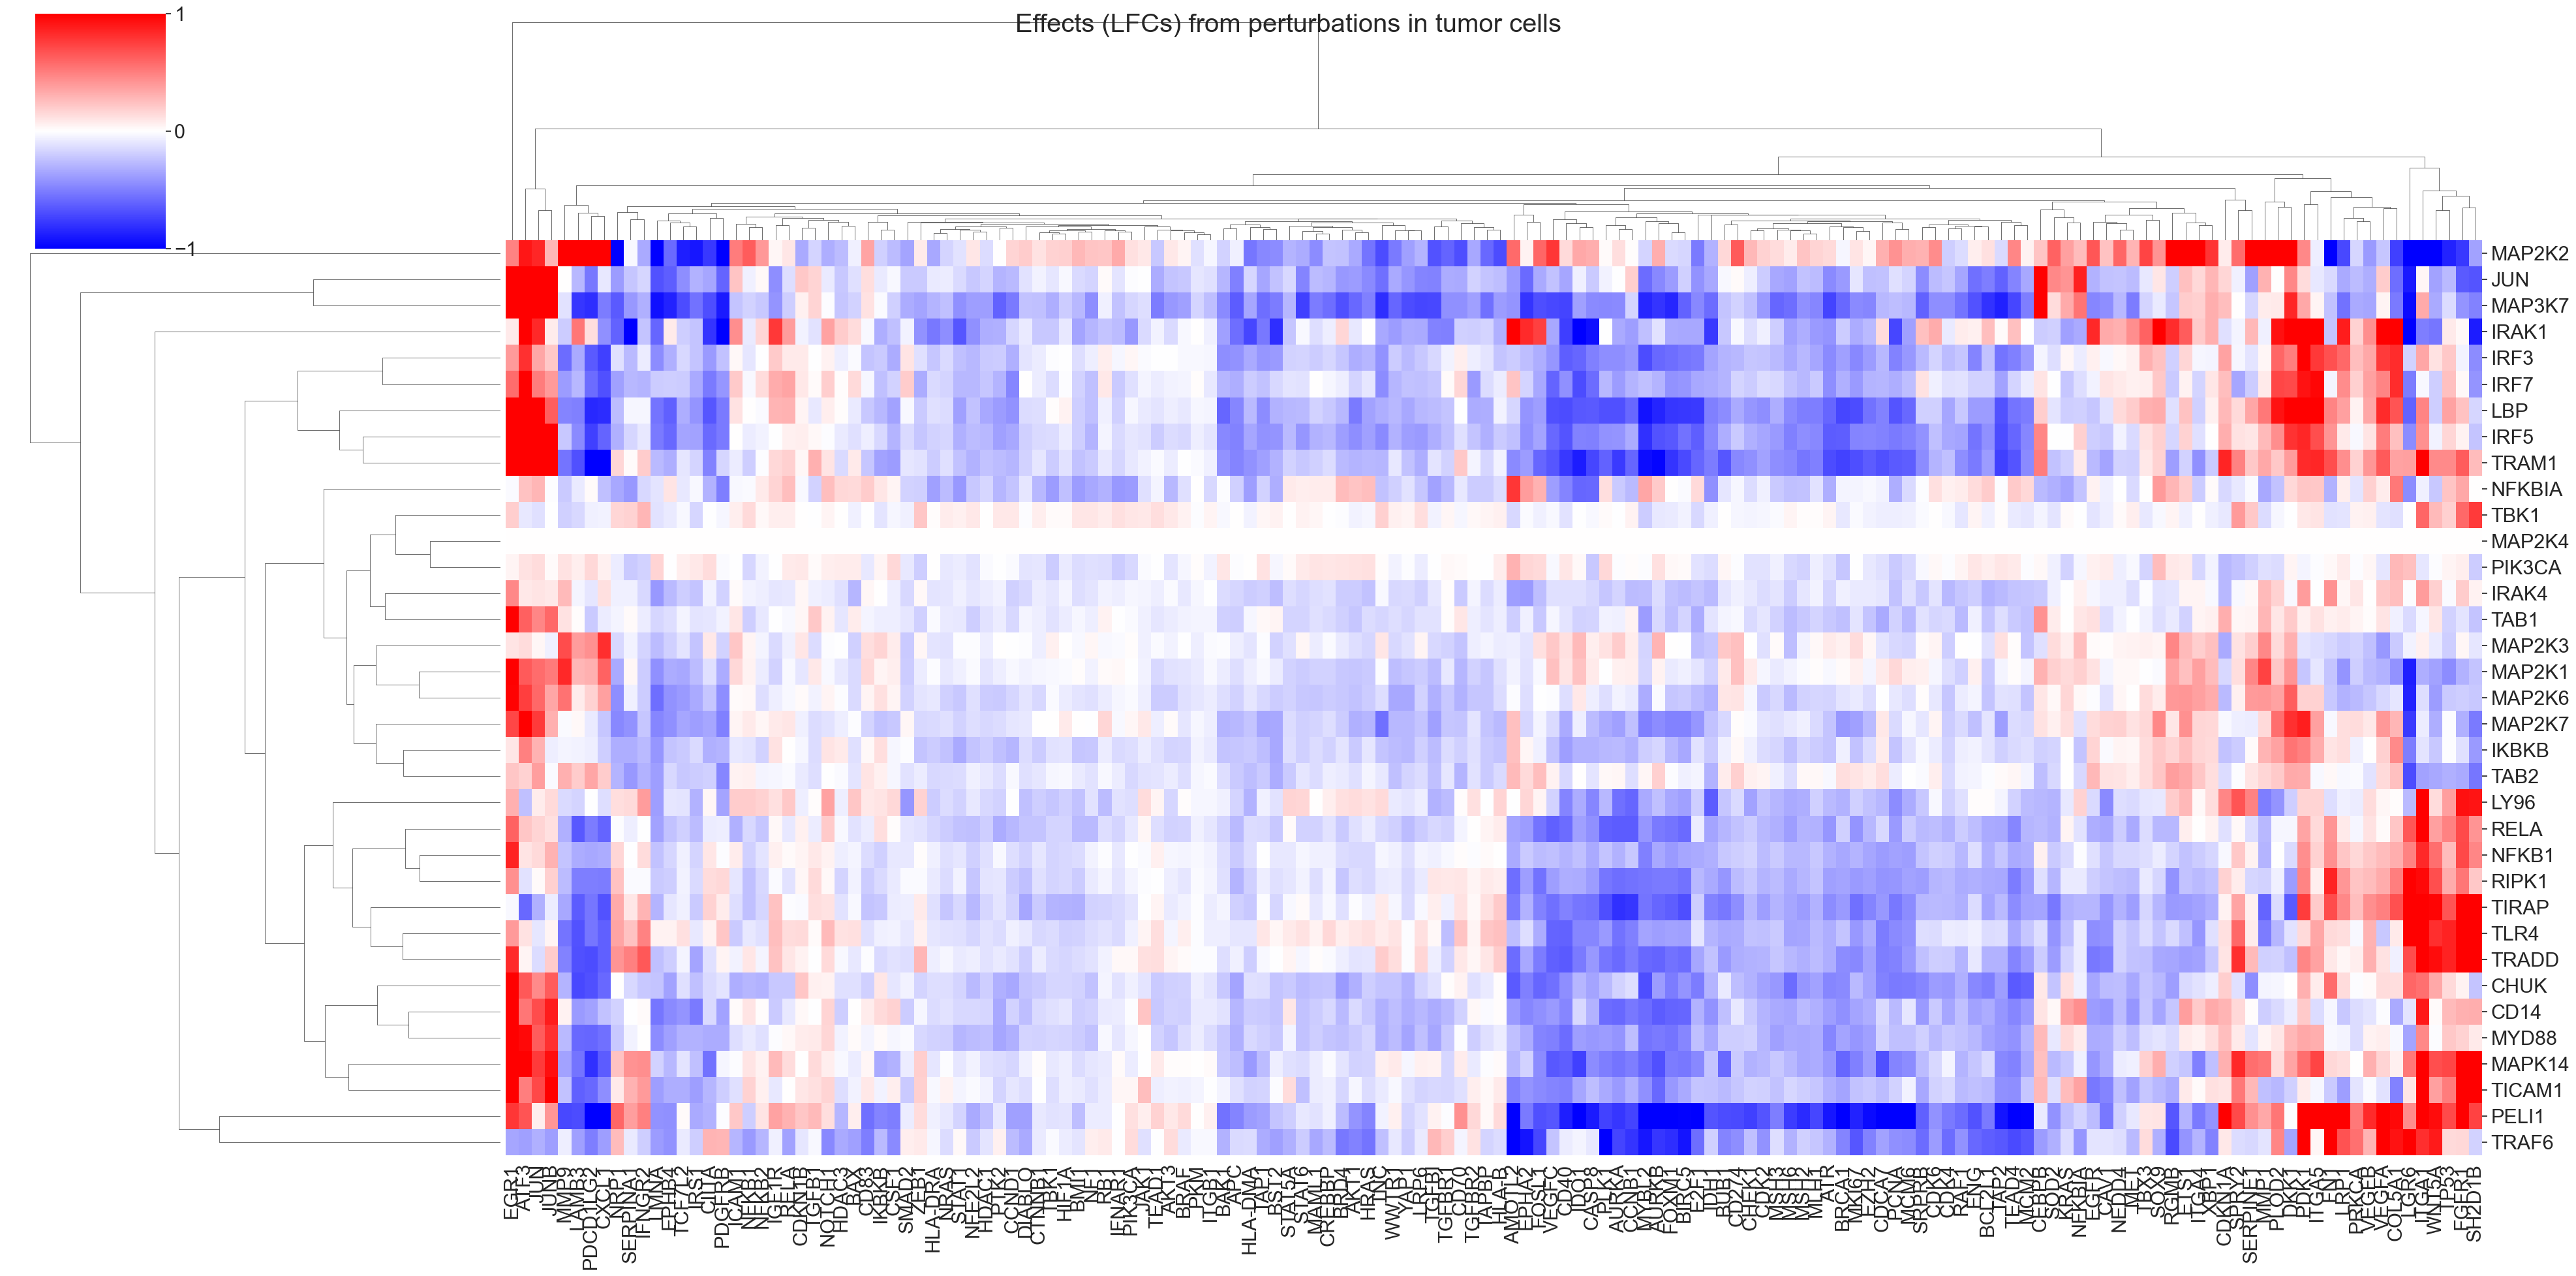

In [4]:
allcancercells = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/filteredLFCsnormal.csv")
allcancercells = allcancercells.set_index('Unnamed: 0', drop=True).rename_axis(None)
allcancercells = allcancercells.loc[::-1]
allcancercells=allcancercells.T
sns.set(font_scale=2)
g=sns.clustermap(allcancercells,cmap='bwr',vmin=-1,vmax=1, cbar_kws={"ticks":[-1,0,1]},center=0,xticklabels=True,yticklabels=True,figsize=(40,20))
g.fig.suptitle('Effects (LFCs) from perturbations in tumor cells')

In [6]:
rows=g.dendrogram_row.reordered_ind
rows
rows = pd.DataFrame(rows)
rows.to_csv("C:/Users/lbinan/Desktop/tumor/morecells/pythonguideorder.csv",sep=',')

In [7]:
column=g.dendrogram_col.reordered_ind
column
column = pd.DataFrame(column)
column.to_csv("C:/Users/lbinan/Desktop/tumor/morecells/pythongeneorder.csv",sep=',')

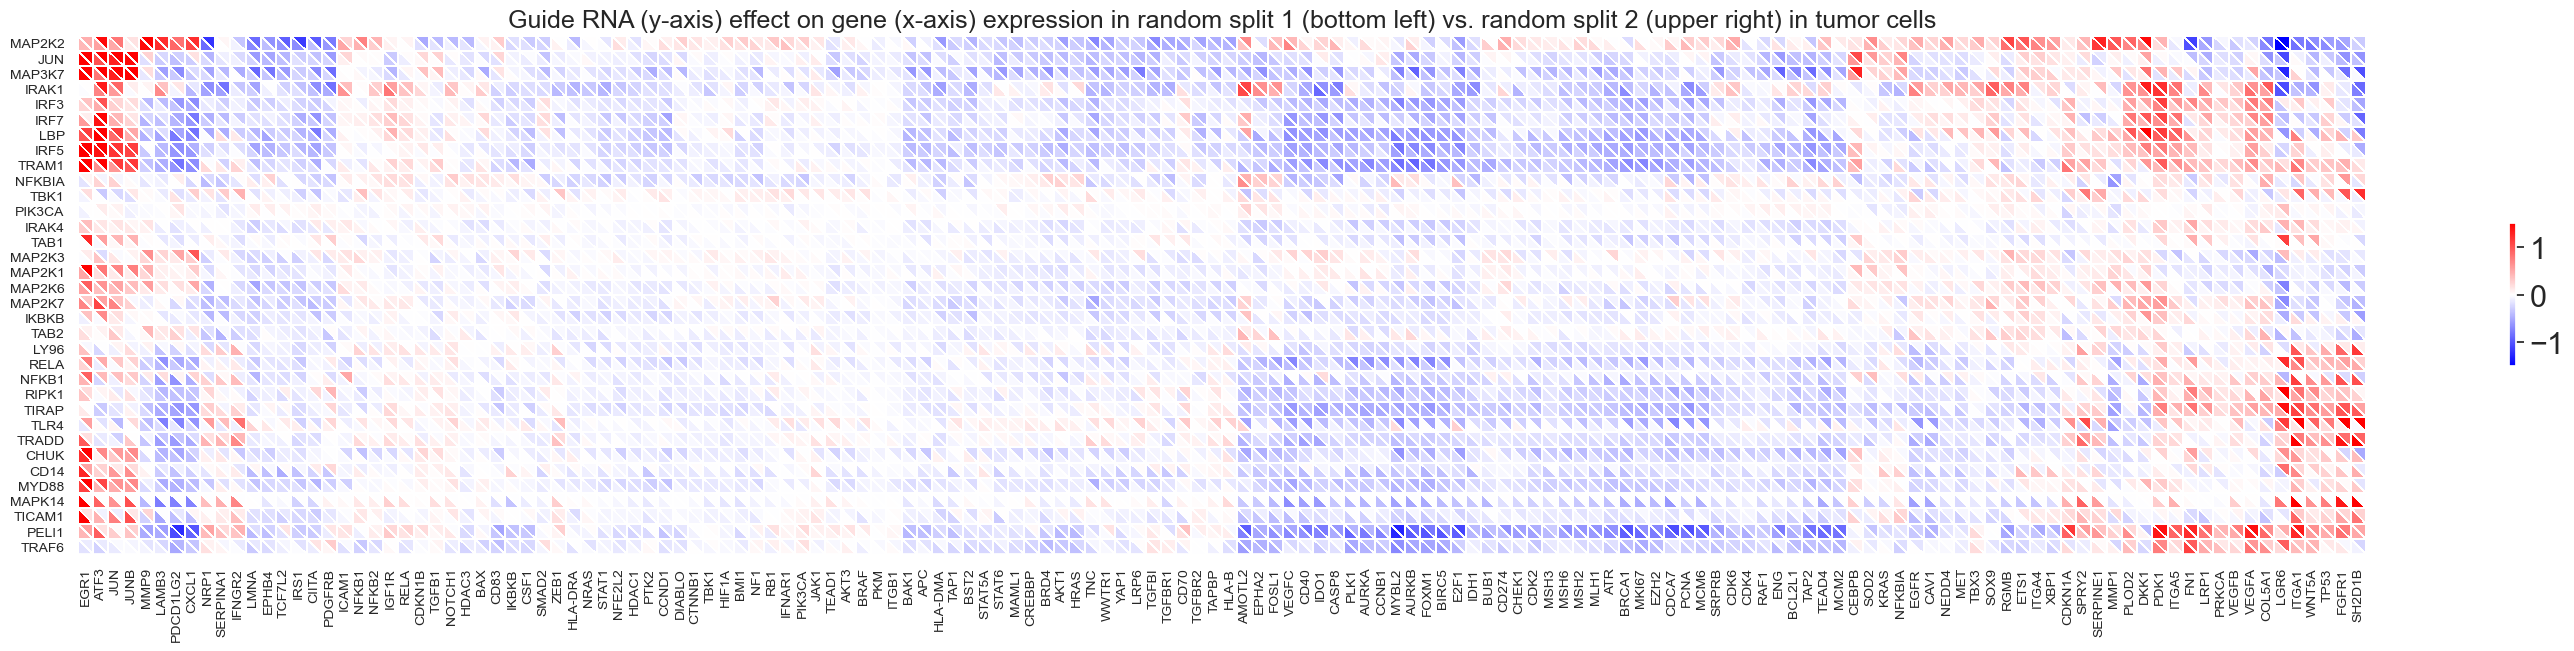

In [5]:
split1 = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/generalsplit1sorted.csv")
split1 = split1.set_index('Unnamed: 0', drop=True).rename_axis(None)
split2 = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/generalsplit2sorted.csv")
split2 = split2.set_index('Unnamed: 0', drop=True).rename_axis(None)
cmap = 'coolwarm' # 'RdBu_r'
#split1=split1.T
split1 = split1.loc[::-1]
#split2=split2.T
split2 = split2.loc[::-1]

plot_split_heatmap_agbt(split1, split2, vmax=5, 
                   tt=f'Guide RNA (y-axis) effect on gene (x-axis) expression in random split 1 (bottom left) vs. random split 2 (upper right) in tumor cells', 
                   anno=False, cmap='bwr', figsize=(30,15), 
                   label_fontsize=10, value_fontsize=10, shrink_factor=0.1)

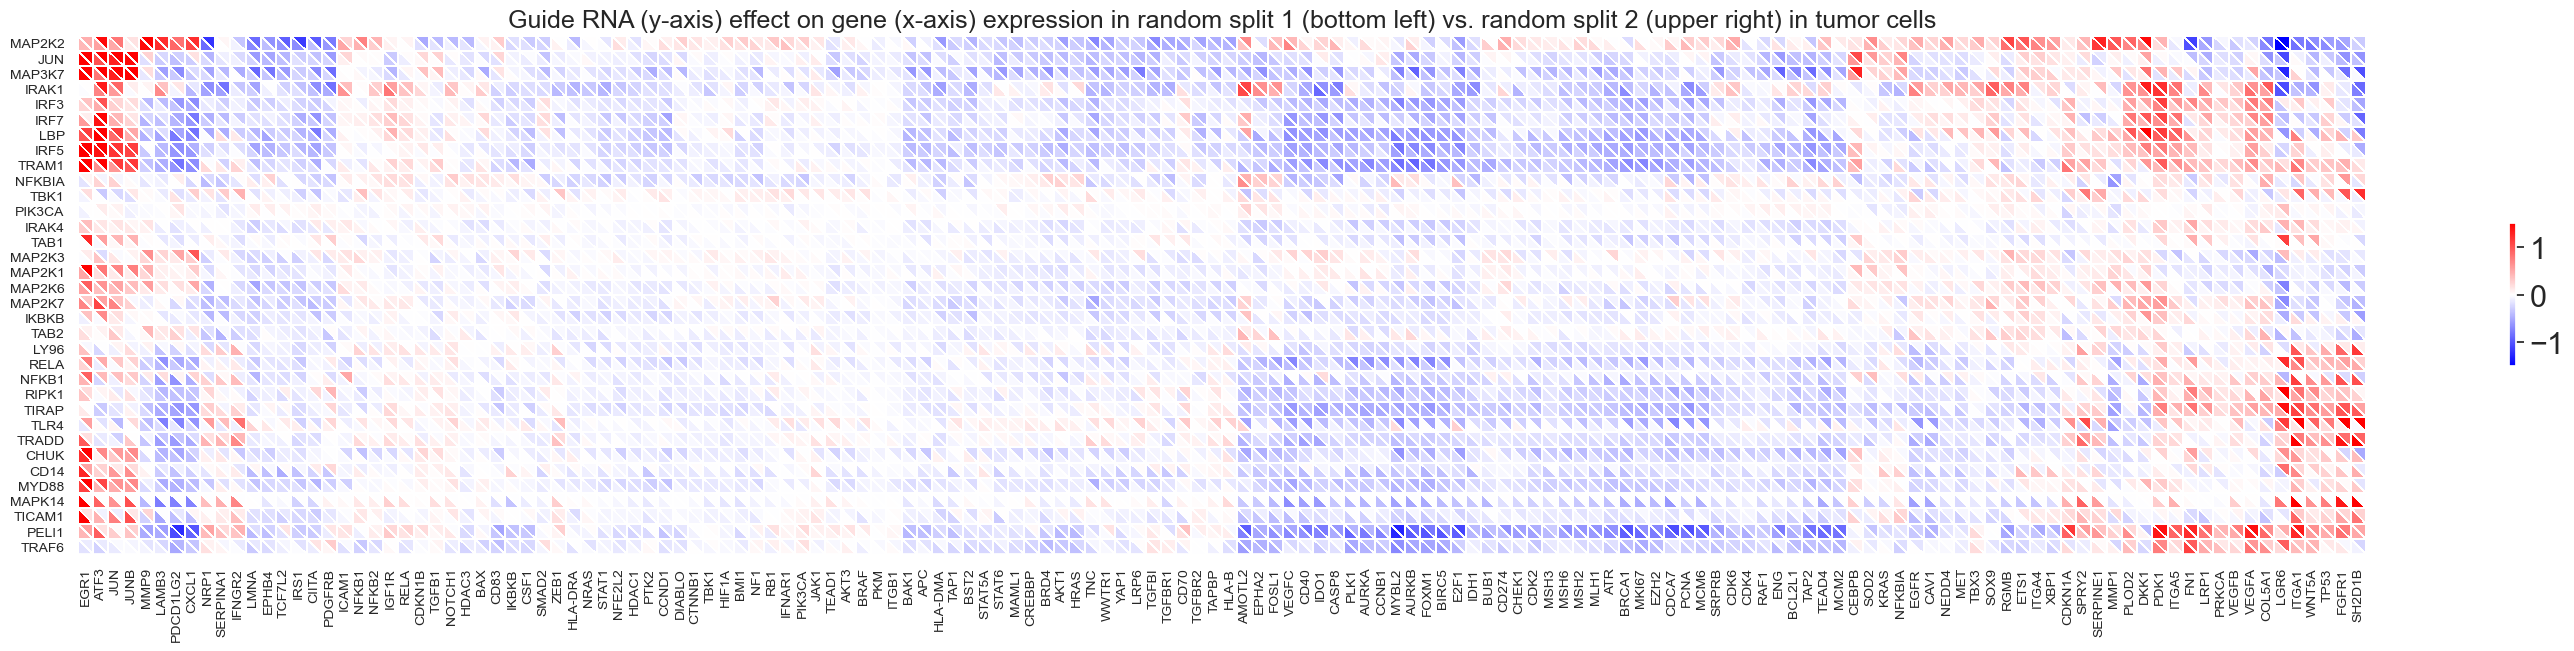

In [6]:
split1 = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/generalsplit1sorted.csv")
split1 = split1.set_index('Unnamed: 0', drop=True).rename_axis(None)
split2 = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/generalsplit2sorted.csv")
split2 = split2.set_index('Unnamed: 0', drop=True).rename_axis(None)
cmap = 'coolwarm' # 'RdBu_r'
#split1=split1.T
split1 = split1.loc[::-1]
#split2=split2.T
split2 = split2.loc[::-1]

save_split_heatmap_agbt(split1, split2, "C:/Users/lbinan/Desktop/tumor/morecells/effectConsistency.eps",vmax=5, 
                   tt=f'Guide RNA (y-axis) effect on gene (x-axis) expression in random split 1 (bottom left) vs. random split 2 (upper right) in tumor cells', 
                   anno=False, cmap='bwr', figsize=(30,15), 
                   label_fontsize=10, value_fontsize=10, shrink_factor=0.1)

Text(0.5, 0.98, 'Effects (LFCs) from perturbations in tumor cells')

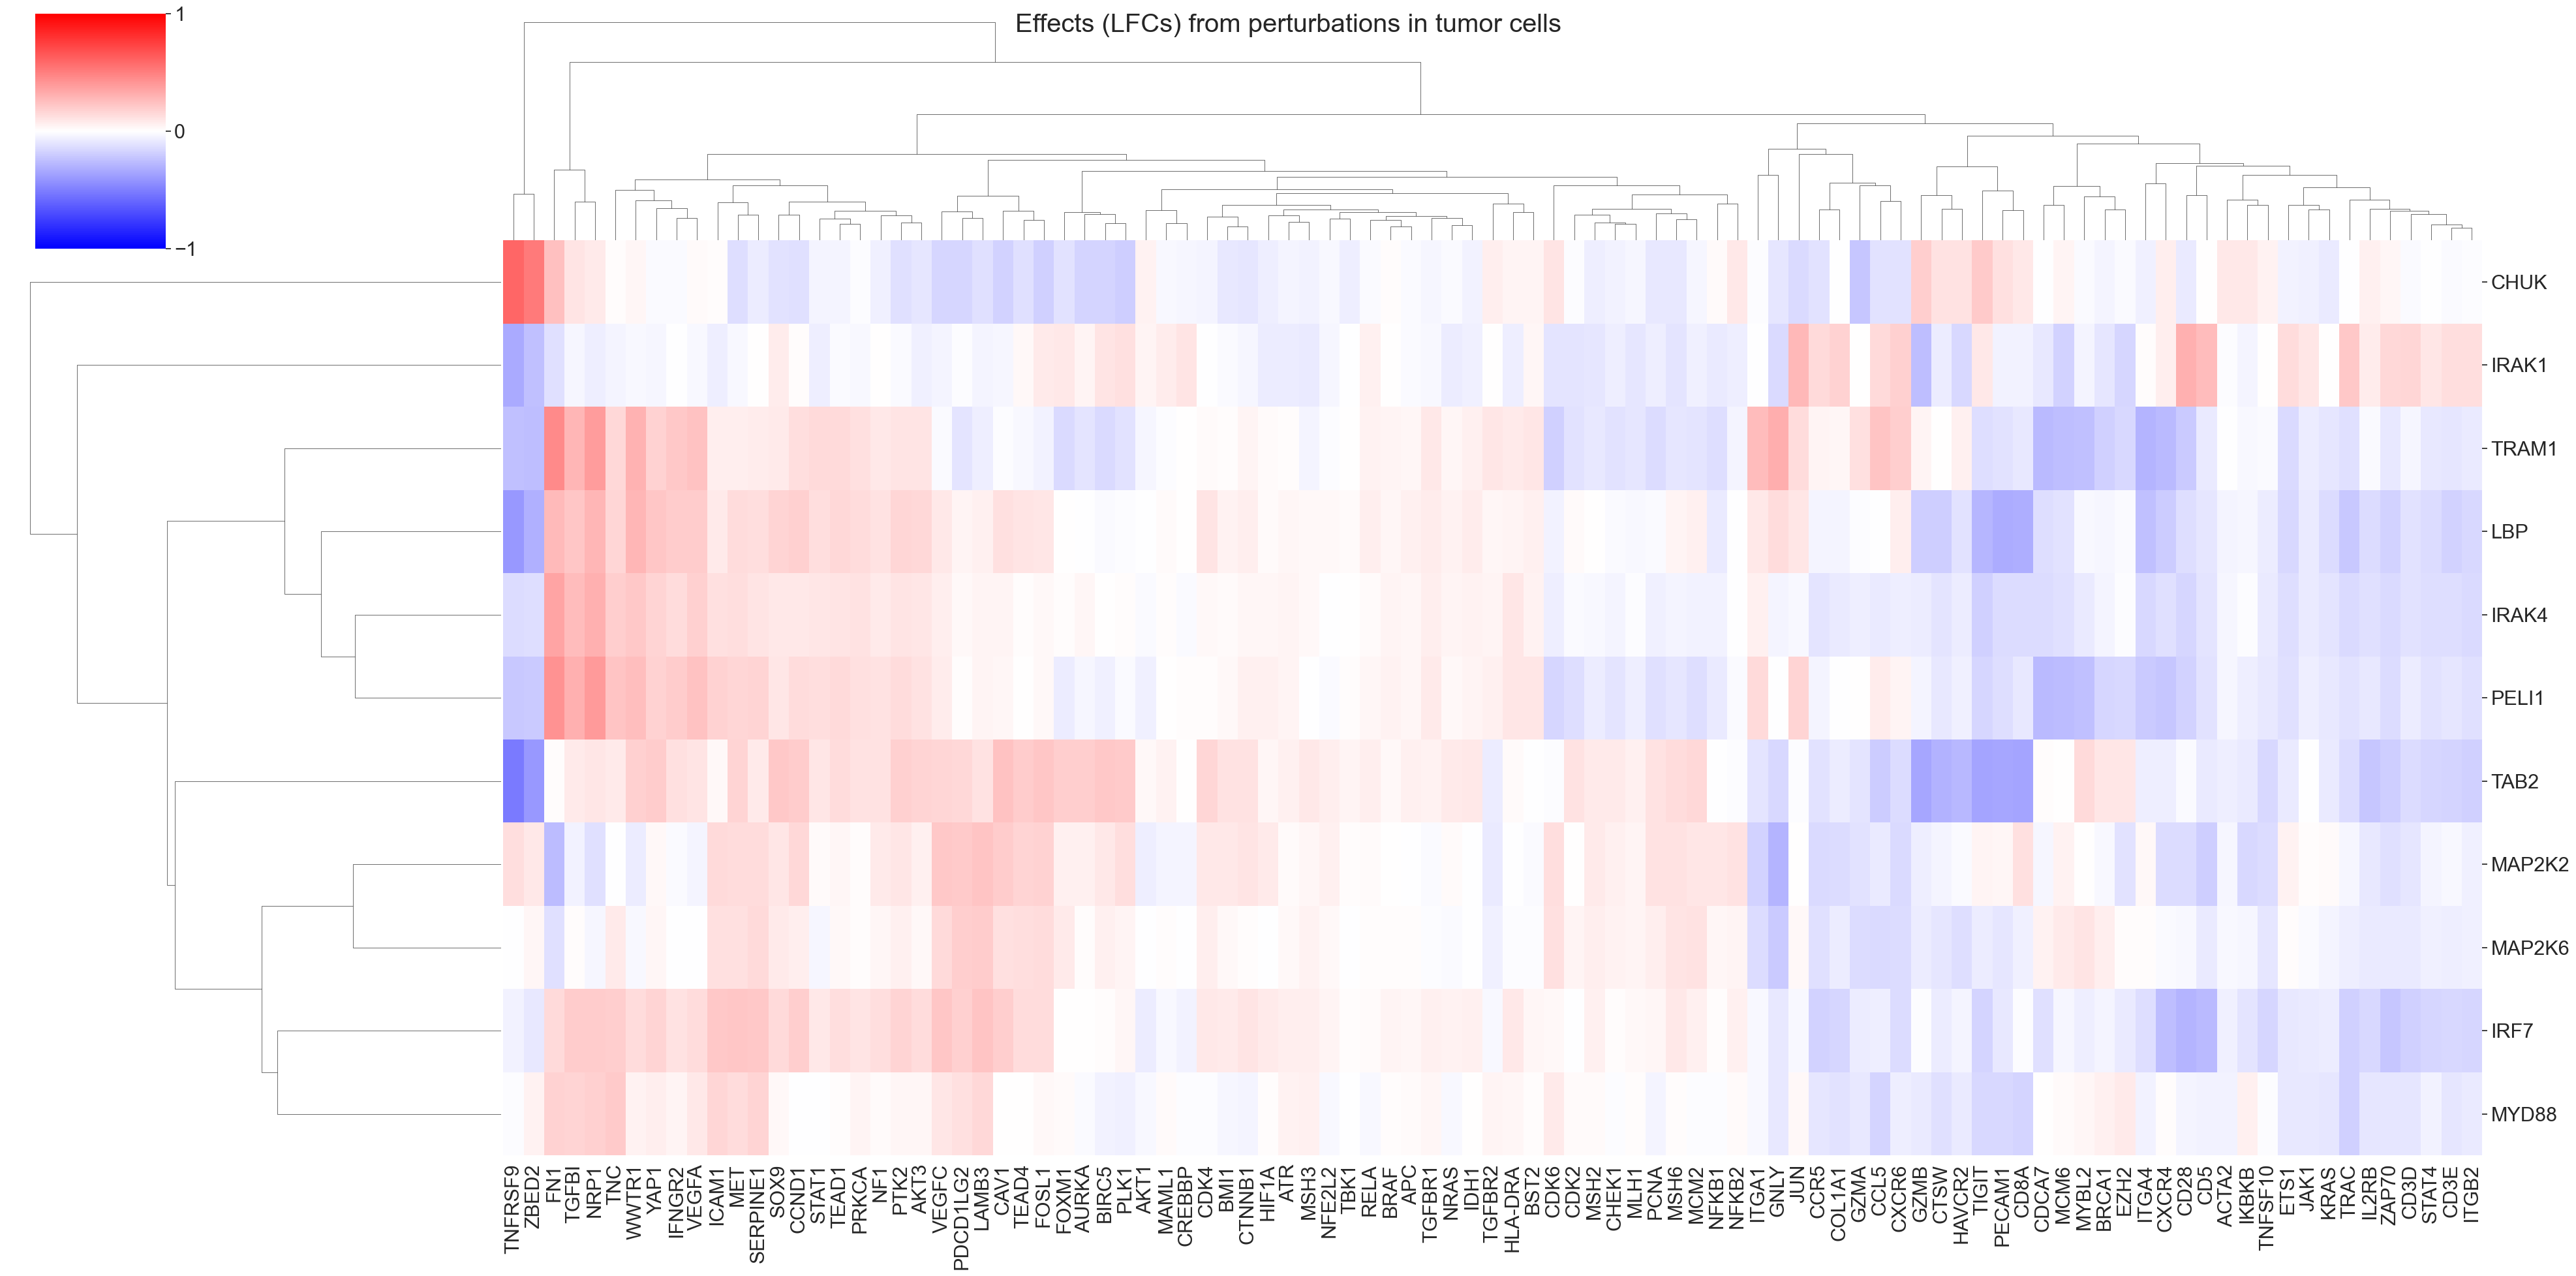

In [29]:
Tcells = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/filteredmoretcells.csv")
Tcells = Tcells.set_index('Unnamed: 0', drop=True).rename_axis(None)
Tcells = Tcells.loc[::-1]
Tcells=Tcells.T
sns.set(font_scale=2)
g=sns.clustermap(Tcells,cmap='bwr',vmin=-1,vmax=1, cbar_kws={"ticks":[-1,0,1]},center=0,xticklabels=True,yticklabels=True,figsize=(40,20))
g.fig.suptitle('Effects (LFCs) from perturbations in tumor cells')

In [30]:
rows=g.dendrogram_row.reordered_ind
rows
rows = pd.DataFrame(rows)
rows.to_csv("C:/Users/lbinan/Desktop/tumor/morecells/pythonguideorderforTcells.csv",sep=',')

In [31]:
column=g.dendrogram_col.reordered_ind
column
column = pd.DataFrame(column)
column.to_csv("C:/Users/lbinan/Desktop/tumor/morecells/pythongeneorderTcells.csv",sep=',')

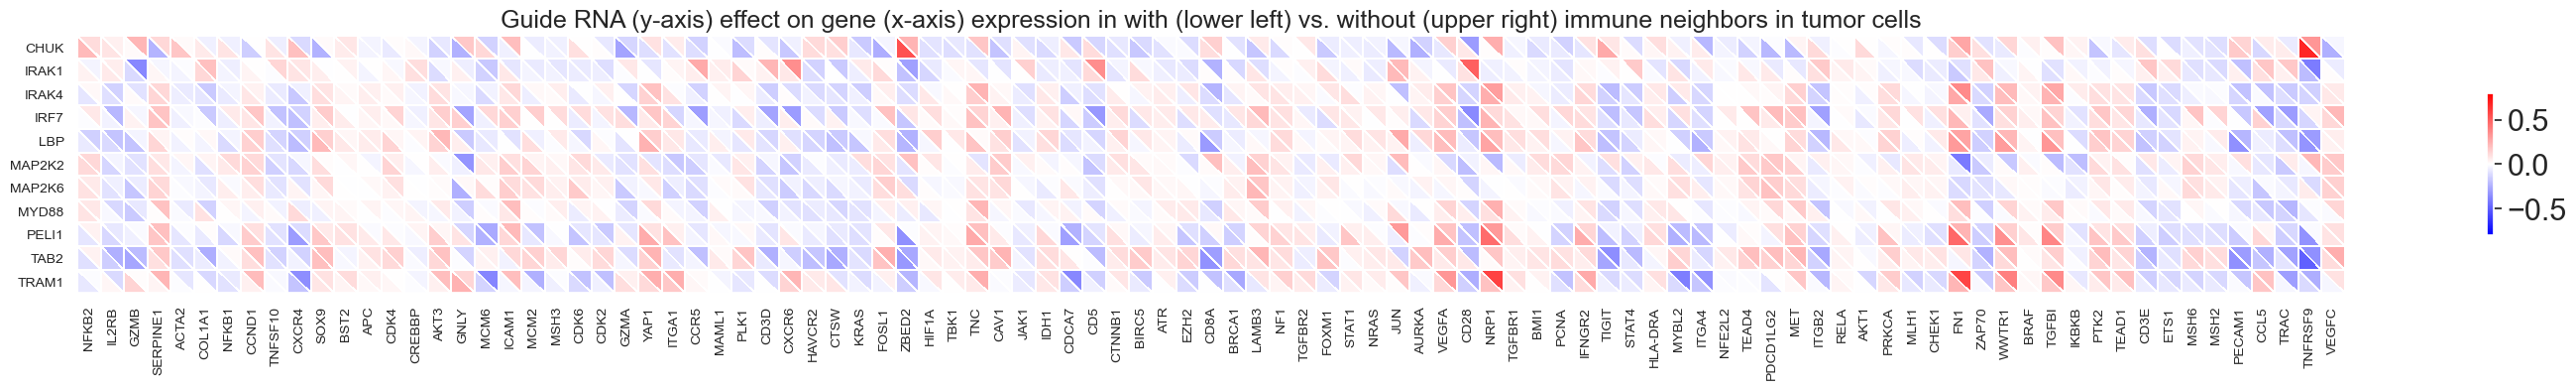

In [35]:
split1 = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/filteredmoretcellssplit1.csv")
split1 = split1.set_index('Unnamed: 0', drop=True).rename_axis(None)
split2 = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/filteredmoretcellssplit2.csv")
split2 = split2.set_index('Unnamed: 0', drop=True).rename_axis(None)
cmap = 'coolwarm' # 'RdBu_r'
split1=split1.T
split1 = split1.loc[::-1]
split2=split2.T
split2 = split2.loc[::-1]

save_split_heatmap_agbt(split1, split2, "C:/Users/lbinan/Desktop/tumor/morecells/effectConsistencyinTcells.eps", vmax=5, 
                   tt=f'Guide RNA (y-axis) effect on gene (x-axis) expression in with (lower left) vs. without (upper right) immune neighbors in tumor cells', 
                   anno=False, cmap='bwr', figsize=(30,15), 
                   label_fontsize=10, value_fontsize=10, shrink_factor=0.1)

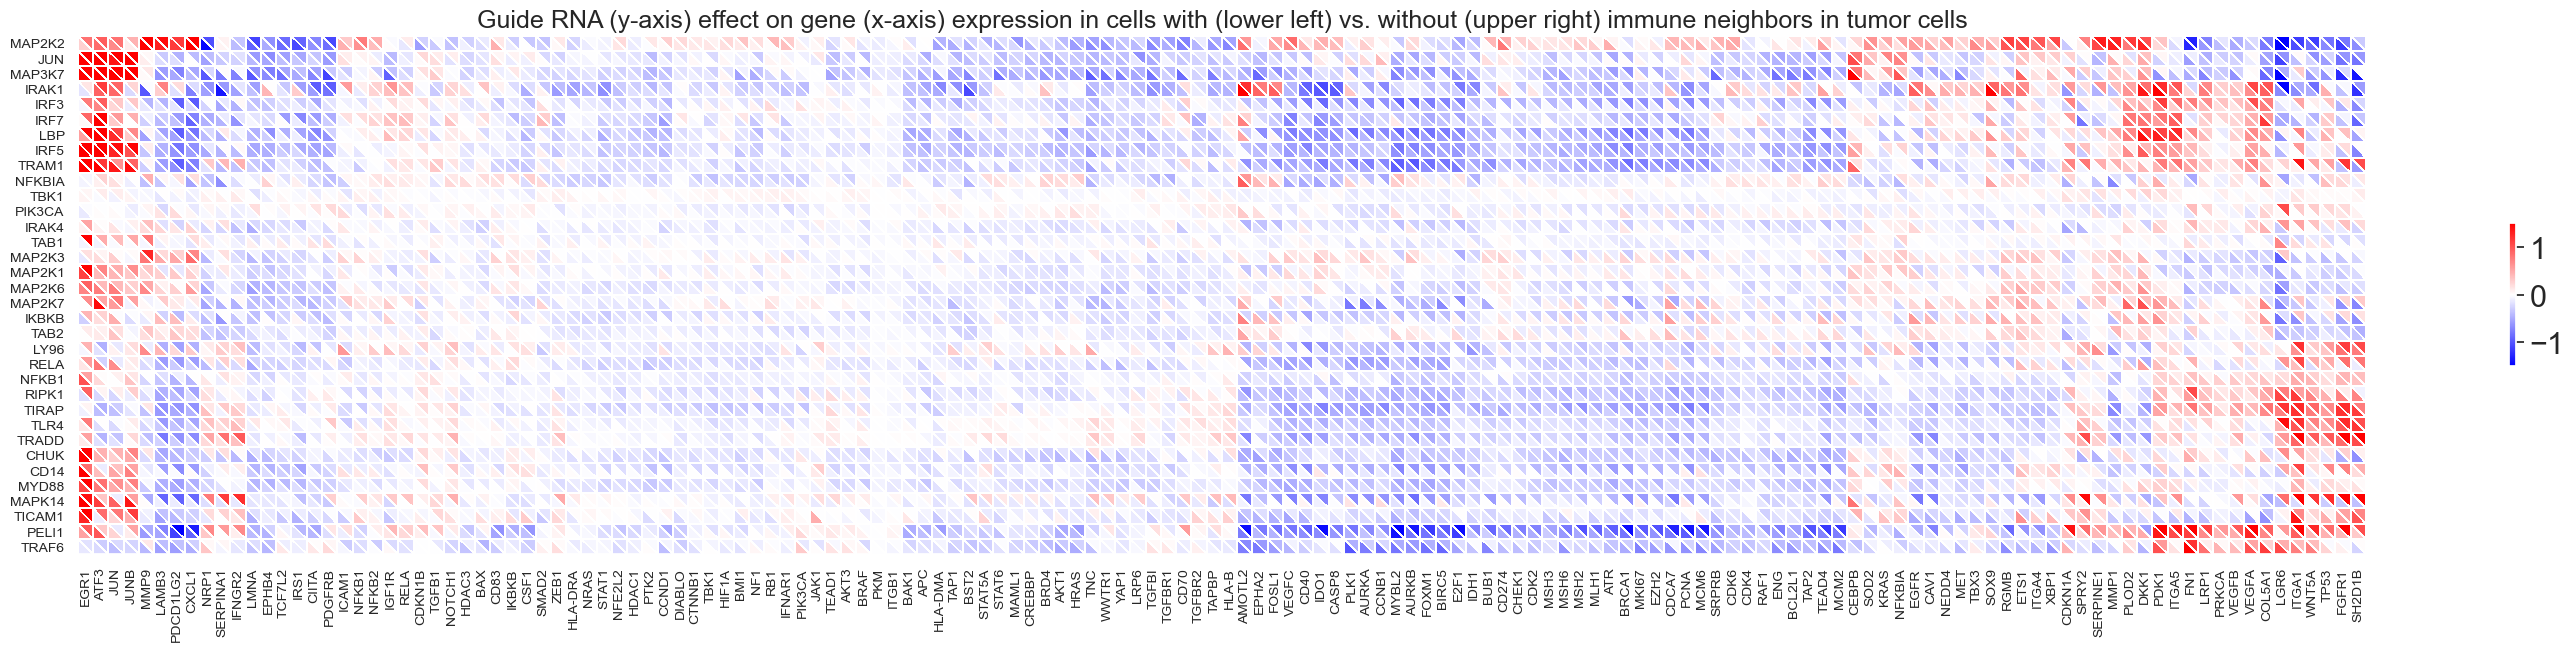

In [9]:
withimmuneneighbors = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/sortedwithimmuneneighbormorecells.csv")
withimmuneneighbors = withimmuneneighbors.set_index('Unnamed: 0', drop=True).rename_axis(None)
withOUTimmuneneighbors = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/sortedwithOUTimmuneneighbormorecells.csv")
withOUTimmuneneighbors = withOUTimmuneneighbors.set_index('Unnamed: 0', drop=True).rename_axis(None)
cmap = 'coolwarm' # 'RdBu_r'
withimmuneneighbors=withimmuneneighbors.T
withimmuneneighbors = withimmuneneighbors.loc[::-1]
withOUTimmuneneighbors=withOUTimmuneneighbors.T
withOUTimmuneneighbors = withOUTimmuneneighbors.loc[::-1]

plot_split_heatmap_agbt(withimmuneneighbors, withOUTimmuneneighbors,vmax=5, 
                   tt=f'Guide RNA (y-axis) effect on gene (x-axis) expression in cells with (lower left) vs. without (upper right) immune neighbors in tumor cells', 
                   anno=False, cmap='bwr', figsize=(30,15), 
                   label_fontsize=10, value_fontsize=10, shrink_factor=0.1)

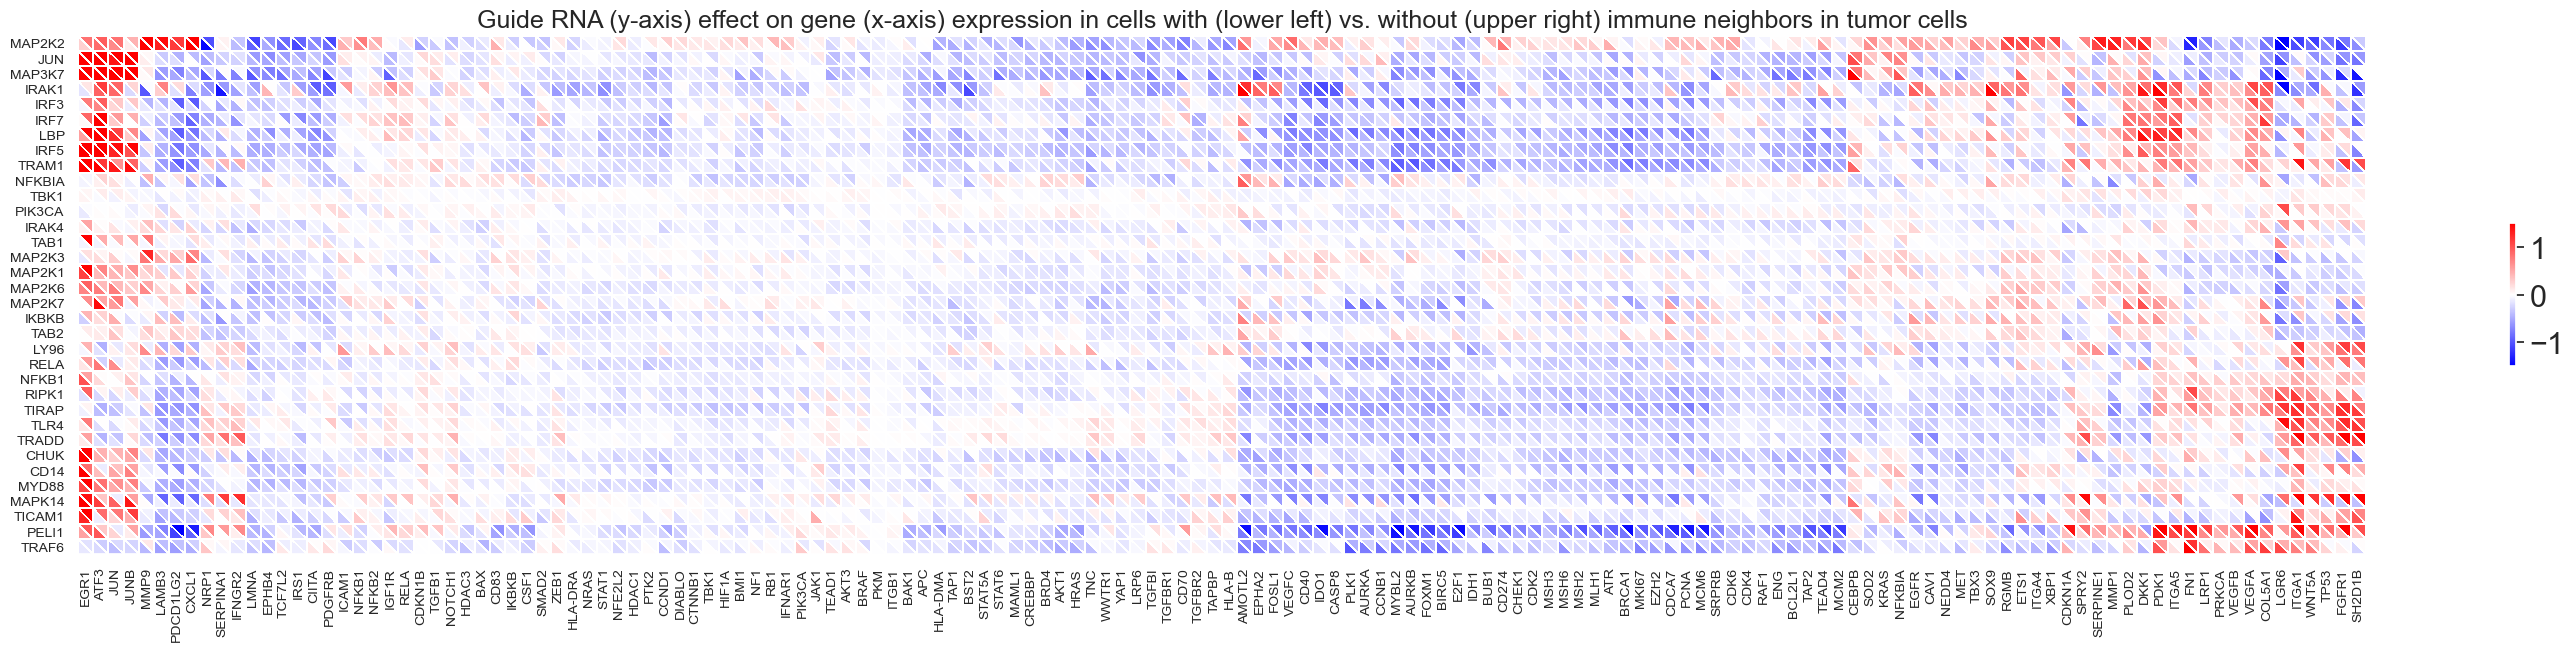

In [13]:
withimmuneneighbors = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/sortedwithimmuneneighbormorecells.csv")
withimmuneneighbors = withimmuneneighbors.set_index('Unnamed: 0', drop=True).rename_axis(None)
withOUTimmuneneighbors = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/sortedwithOUTimmuneneighbormorecells.csv")
withOUTimmuneneighbors = withOUTimmuneneighbors.set_index('Unnamed: 0', drop=True).rename_axis(None)
cmap = 'coolwarm' # 'RdBu_r'
withimmuneneighbors=withimmuneneighbors.T
withimmuneneighbors = withimmuneneighbors.loc[::-1]
withOUTimmuneneighbors=withOUTimmuneneighbors.T
withOUTimmuneneighbors = withOUTimmuneneighbors.loc[::-1]

plot_split_heatmap_agbt(withimmuneneighbors, withOUTimmuneneighbors, vmax=5, 
                   tt=f'Guide RNA (y-axis) effect on gene (x-axis) expression in cells with (lower left) vs. without (upper right) immune neighbors in tumor cells', 
                   anno=False, cmap='bwr', figsize=(30,15), 
                   label_fontsize=10, value_fontsize=10, shrink_factor=0.1)

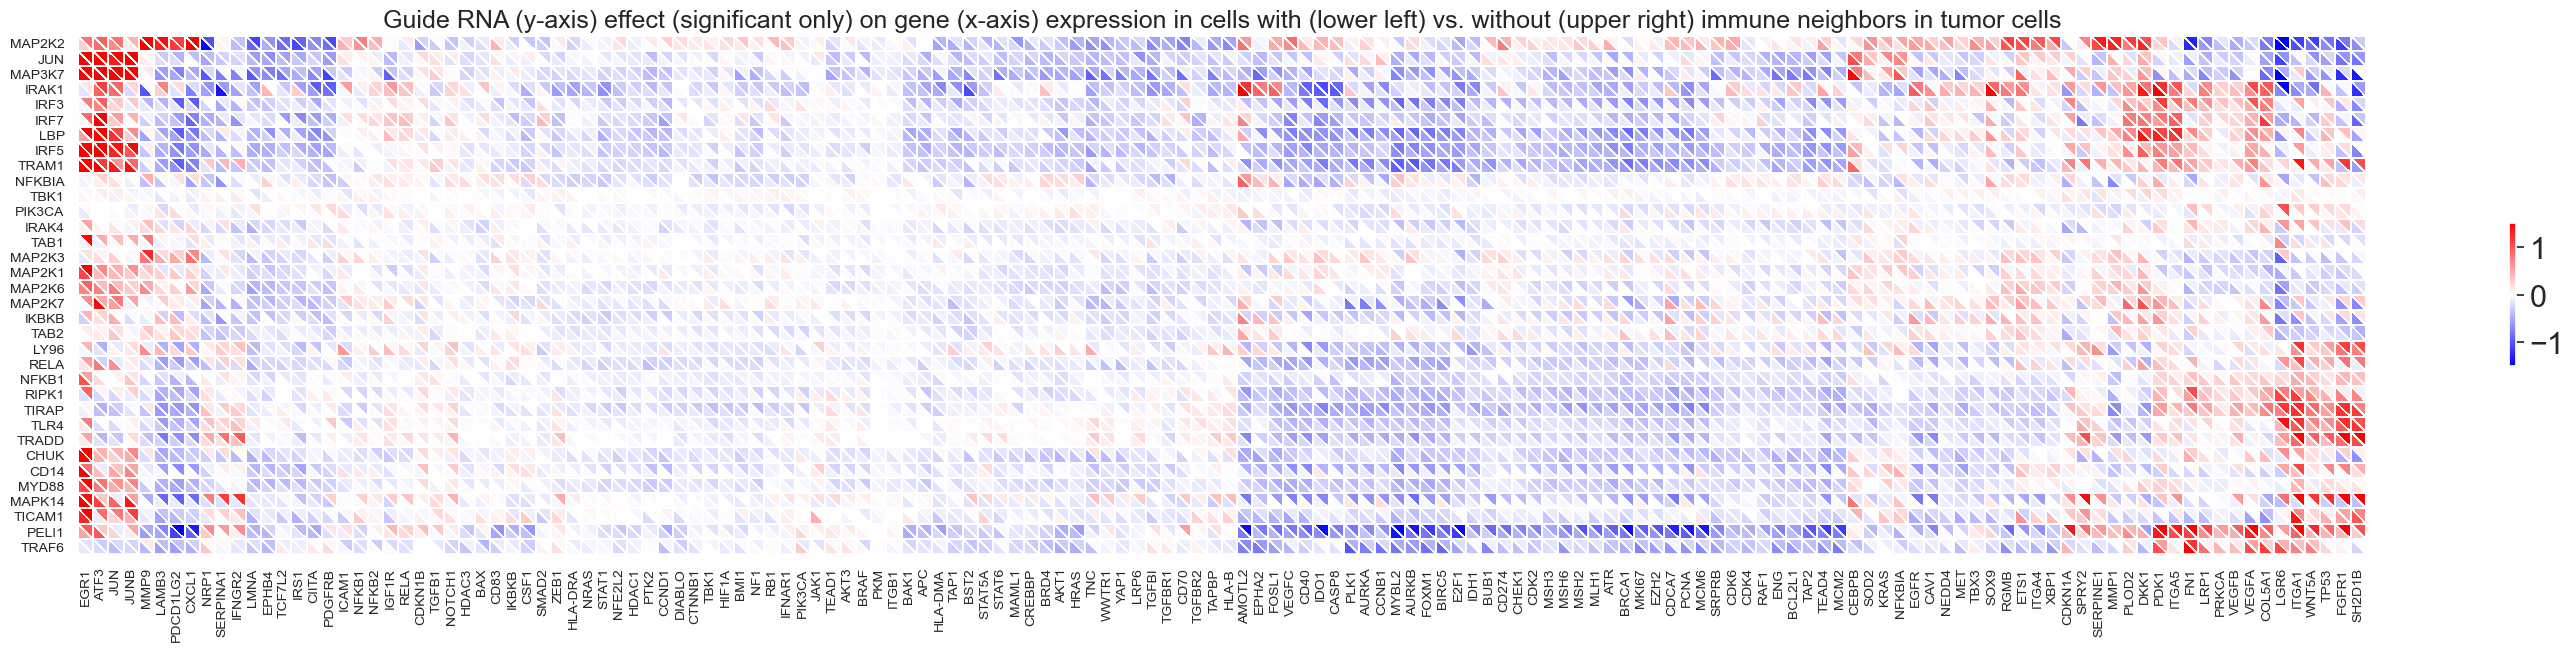

In [10]:
withimmuneneighbors = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/sortedwithimmuneneighbormorecells.csv")
withimmuneneighbors = withimmuneneighbors.set_index('Unnamed: 0', drop=True).rename_axis(None)
withOUTimmuneneighbors = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/sortedwithOUTimmuneneighbormorecells.csv")
withOUTimmuneneighbors = withOUTimmuneneighbors.set_index('Unnamed: 0', drop=True).rename_axis(None)
cmap = 'coolwarm' # 'RdBu_r'
withimmuneneighbors=withimmuneneighbors.T
withimmuneneighbors = withimmuneneighbors.loc[::-1]
withOUTimmuneneighbors=withOUTimmuneneighbors.T
withOUTimmuneneighbors = withOUTimmuneneighbors.loc[::-1]

save_split_heatmap_agbt(withimmuneneighbors, withOUTimmuneneighbors,  "C:/Users/lbinan/Desktop/tumor/morecells/withandwithoutimmuneneighbor.eps", vmax=5, 
                   tt=f'Guide RNA (y-axis) effect (significant only) on gene (x-axis) expression in cells with (lower left) vs. without (upper right) immune neighbors in tumor cells', 
                   anno=False, cmap='bwr', figsize=(30,15), 
                   label_fontsize=10, value_fontsize=10, shrink_factor=0.1)

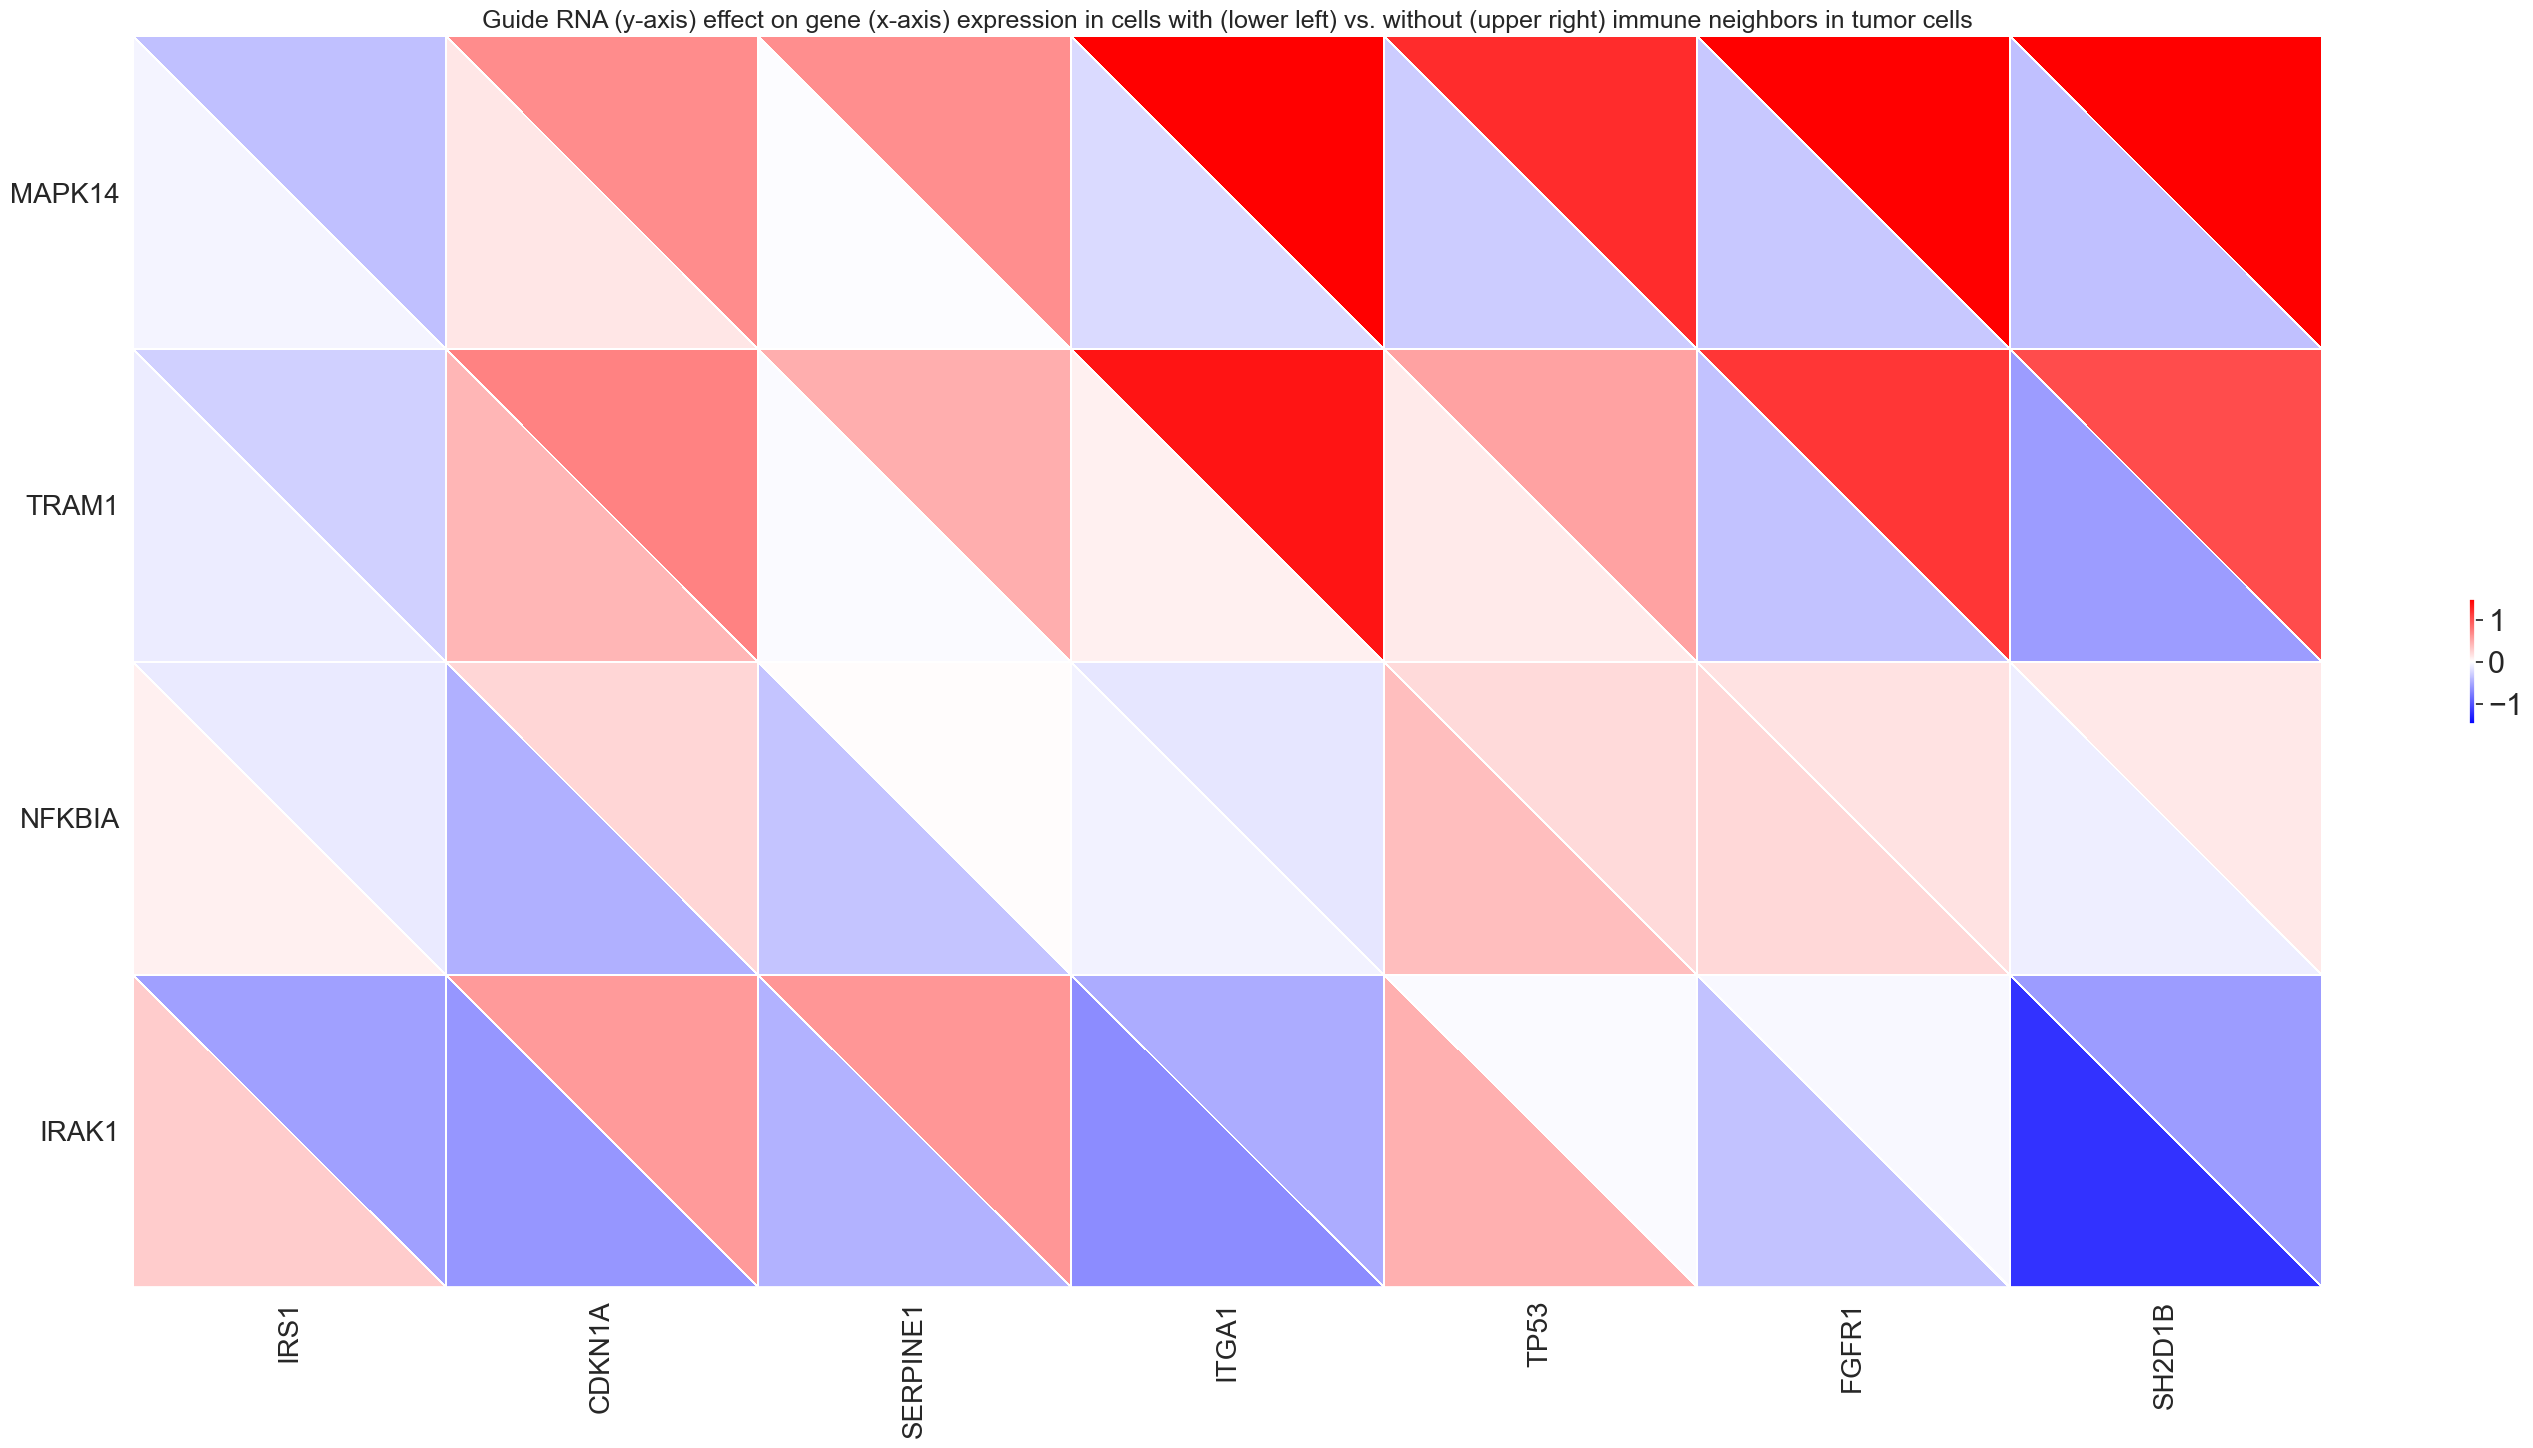

In [17]:
withimmuneneighbors = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/sortedwithimmuneneighbormorecells.csv")
withimmuneneighbors = withimmuneneighbors.set_index('Unnamed: 0', drop=True).rename_axis(None)
withOUTimmuneneighbors = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/sortedwithOUTimmuneneighbormorecells.csv")
withOUTimmuneneighbors = withOUTimmuneneighbors.set_index('Unnamed: 0', drop=True).rename_axis(None)
cmap = 'coolwarm' # 'RdBu_r'
withimmuneneighbors=withimmuneneighbors.T
withimmuneneighbors = withimmuneneighbors.loc[::-1]
withOUTimmuneneighbors=withOUTimmuneneighbors.T
withOUTimmuneneighbors = withOUTimmuneneighbors.loc[::-1]

save_split_heatmap_agbt(withimmuneneighbors.loc[['IRAK1','NFKBIA','TRAM1','MAPK14'],['IRS1','CDKN1A','SERPINE1','ITGA1','TP53','FGFR1','SH2D1B']], withOUTimmuneneighbors.loc[['IRAK1','NFKBIA','TRAM1','MAPK14'],['IRS1','CDKN1A','SERPINE1','ITGA1','TP53','FGFR1','SH2D1B']],  "C:/Users/lbinan/Desktop/tumor/morecells/withandwithoutimmuneneighborZOOM.eps", vmax=5, 
                   tt=f'Guide RNA (y-axis) effect on gene (x-axis) expression in cells with (lower left) vs. without (upper right) immune neighbors in tumor cells', 
                   anno=False, cmap='bwr', figsize=(30,15), 
                   label_fontsize=20, value_fontsize=20, shrink_factor=0.1)

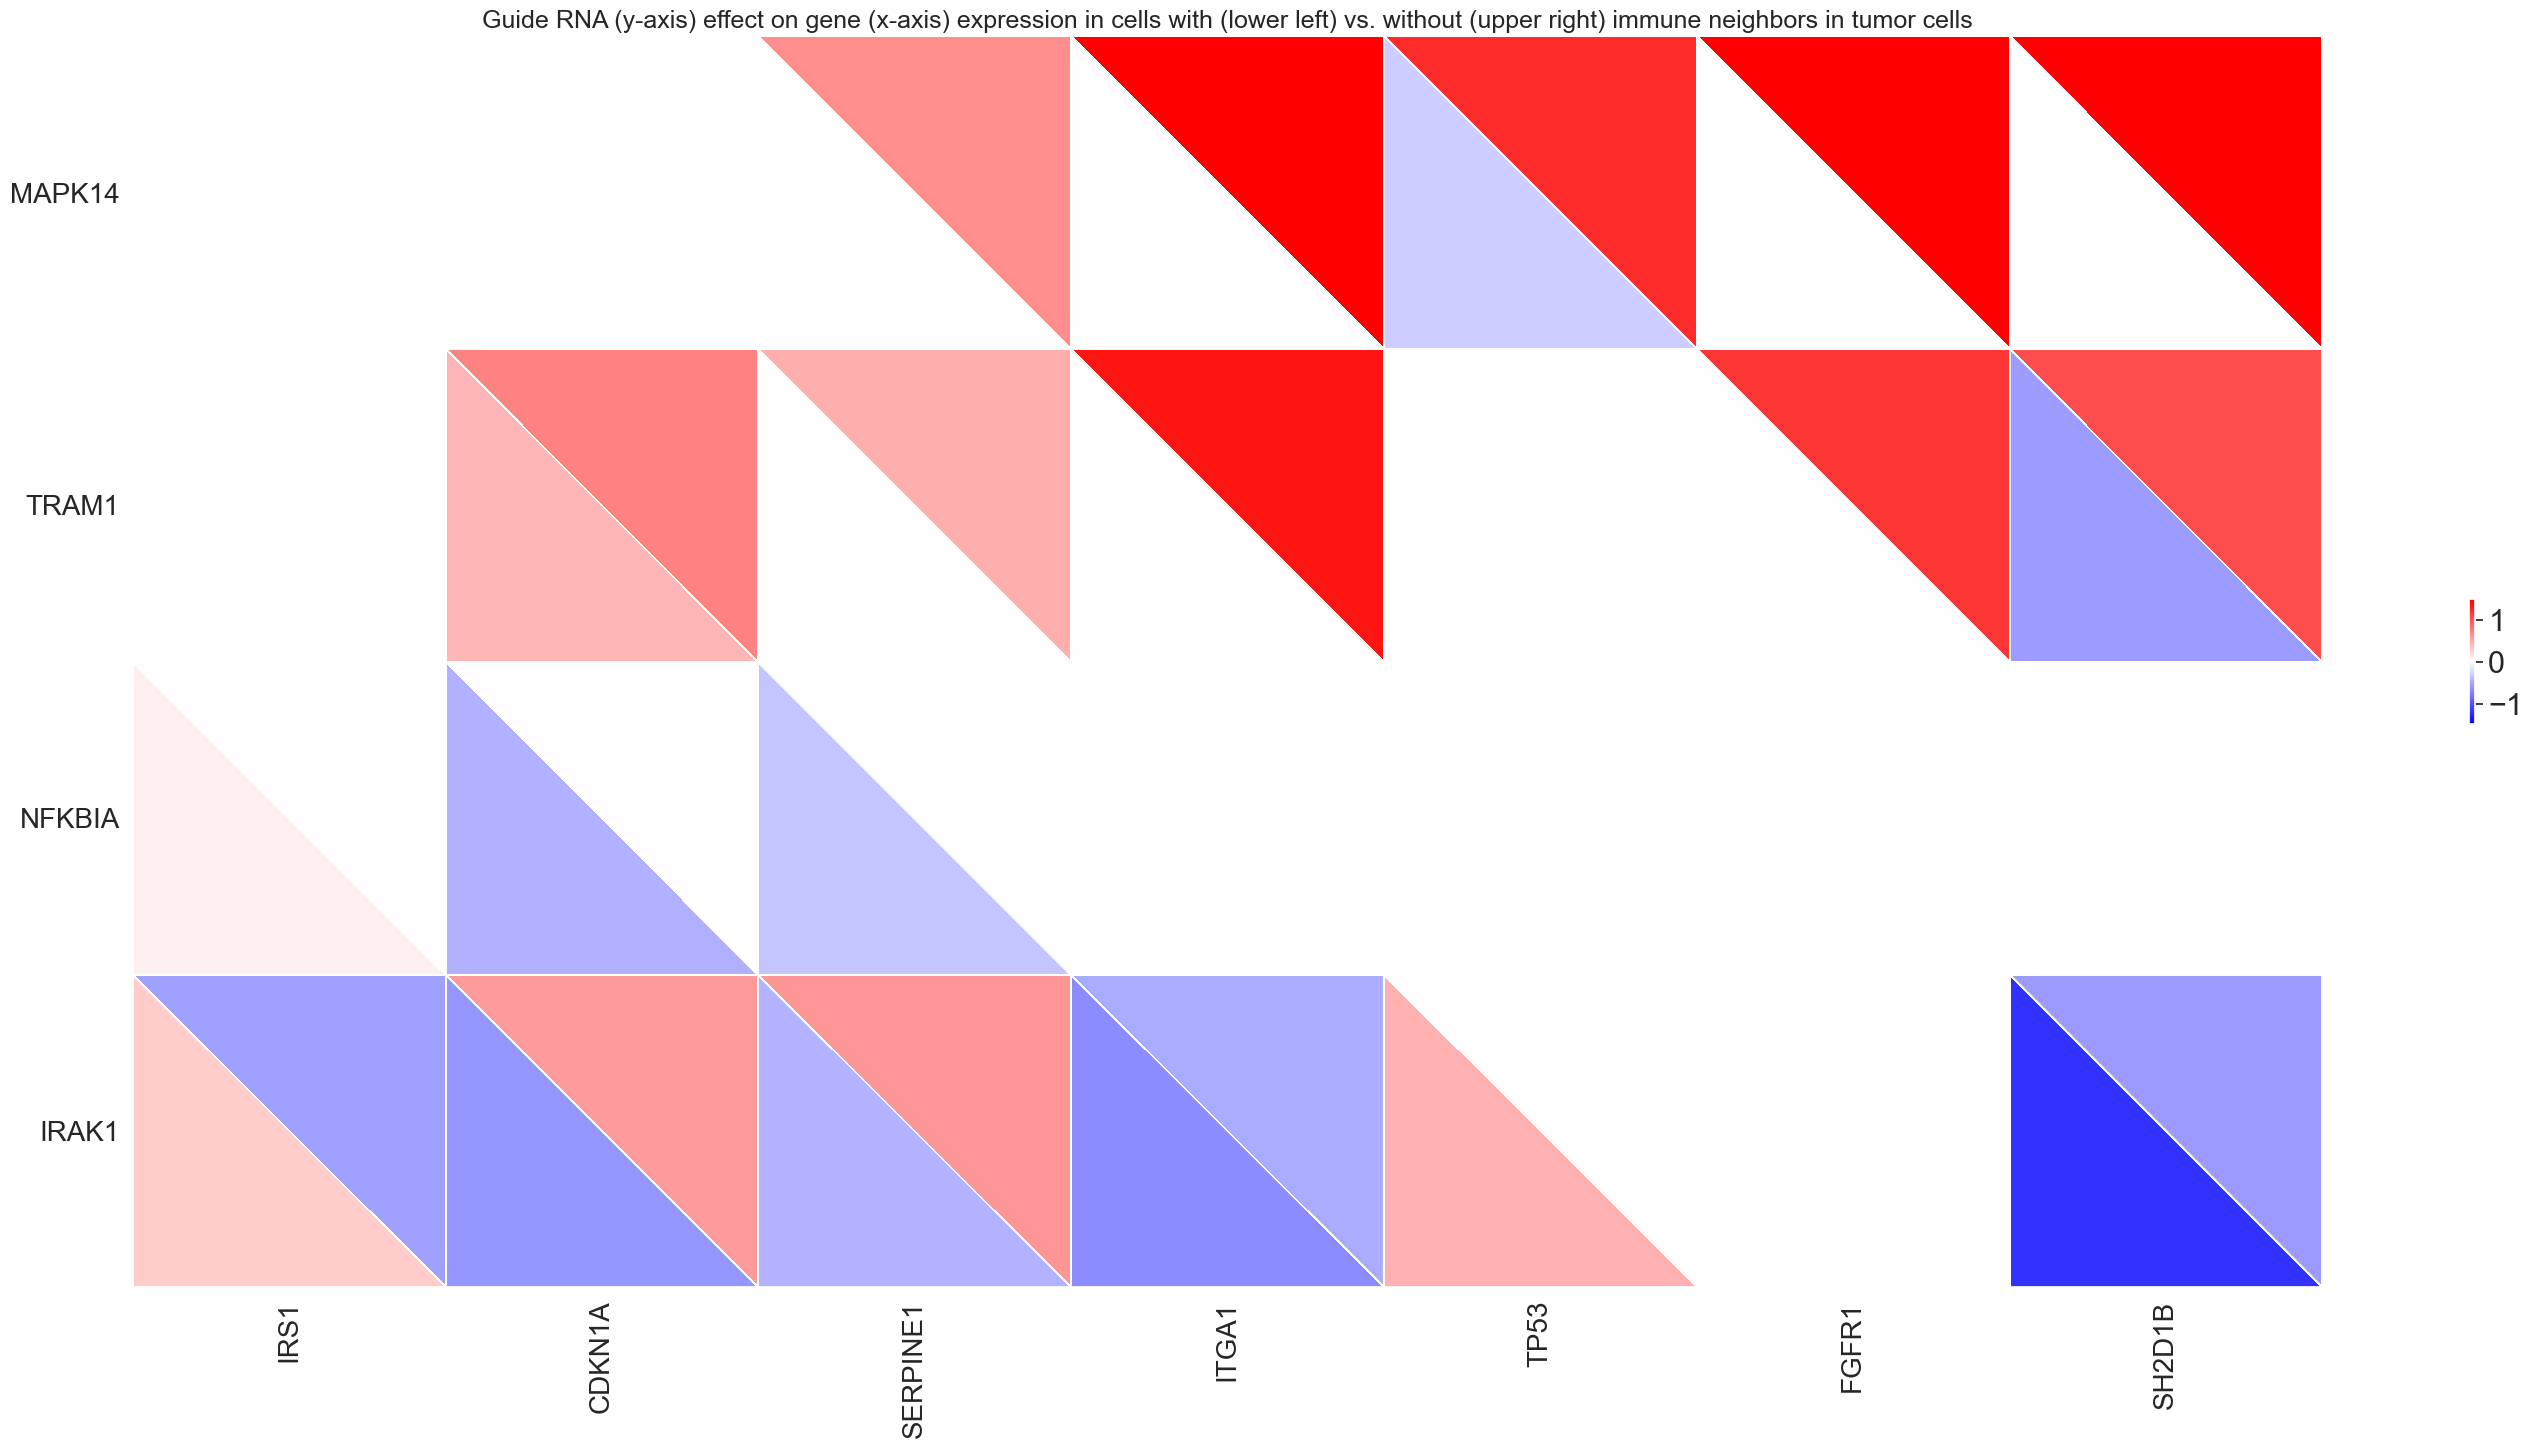

In [15]:
withimmuneneighbors = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/sortedWHITEwithimmuneneighbormorecells.csv")
withimmuneneighbors = withimmuneneighbors.set_index('Unnamed: 0', drop=True).rename_axis(None)
withOUTimmuneneighbors = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/sortedWHITEwithOUTimmuneneighbormorecells.csv")
withOUTimmuneneighbors = withOUTimmuneneighbors.set_index('Unnamed: 0', drop=True).rename_axis(None)
cmap = 'coolwarm' # 'RdBu_r'
withimmuneneighbors=withimmuneneighbors.T
withimmuneneighbors = withimmuneneighbors.loc[::-1]
withOUTimmuneneighbors=withOUTimmuneneighbors.T
withOUTimmuneneighbors = withOUTimmuneneighbors.loc[::-1]

plot_split_heatmap_agbt(withimmuneneighbors.loc[['IRAK1','NFKBIA','TRAM1','MAPK14'],['IRS1','CDKN1A','SERPINE1','ITGA1','TP53','FGFR1','SH2D1B']], withOUTimmuneneighbors.loc[['IRAK1','NFKBIA','TRAM1','MAPK14'],['IRS1','CDKN1A','SERPINE1','ITGA1','TP53','FGFR1','SH2D1B']], vmax=5, 
                   tt=f'Guide RNA (y-axis) effect on gene (x-axis) expression in cells with (lower left) vs. without (upper right) immune neighbors in tumor cells', 
                   anno=False, cmap='bwr', figsize=(30,15), 
                   label_fontsize=20, value_fontsize=20, shrink_factor=0.1)

Text(0.5, 0.98, 'Effects (LFCs) from perturbations in tumor cells')

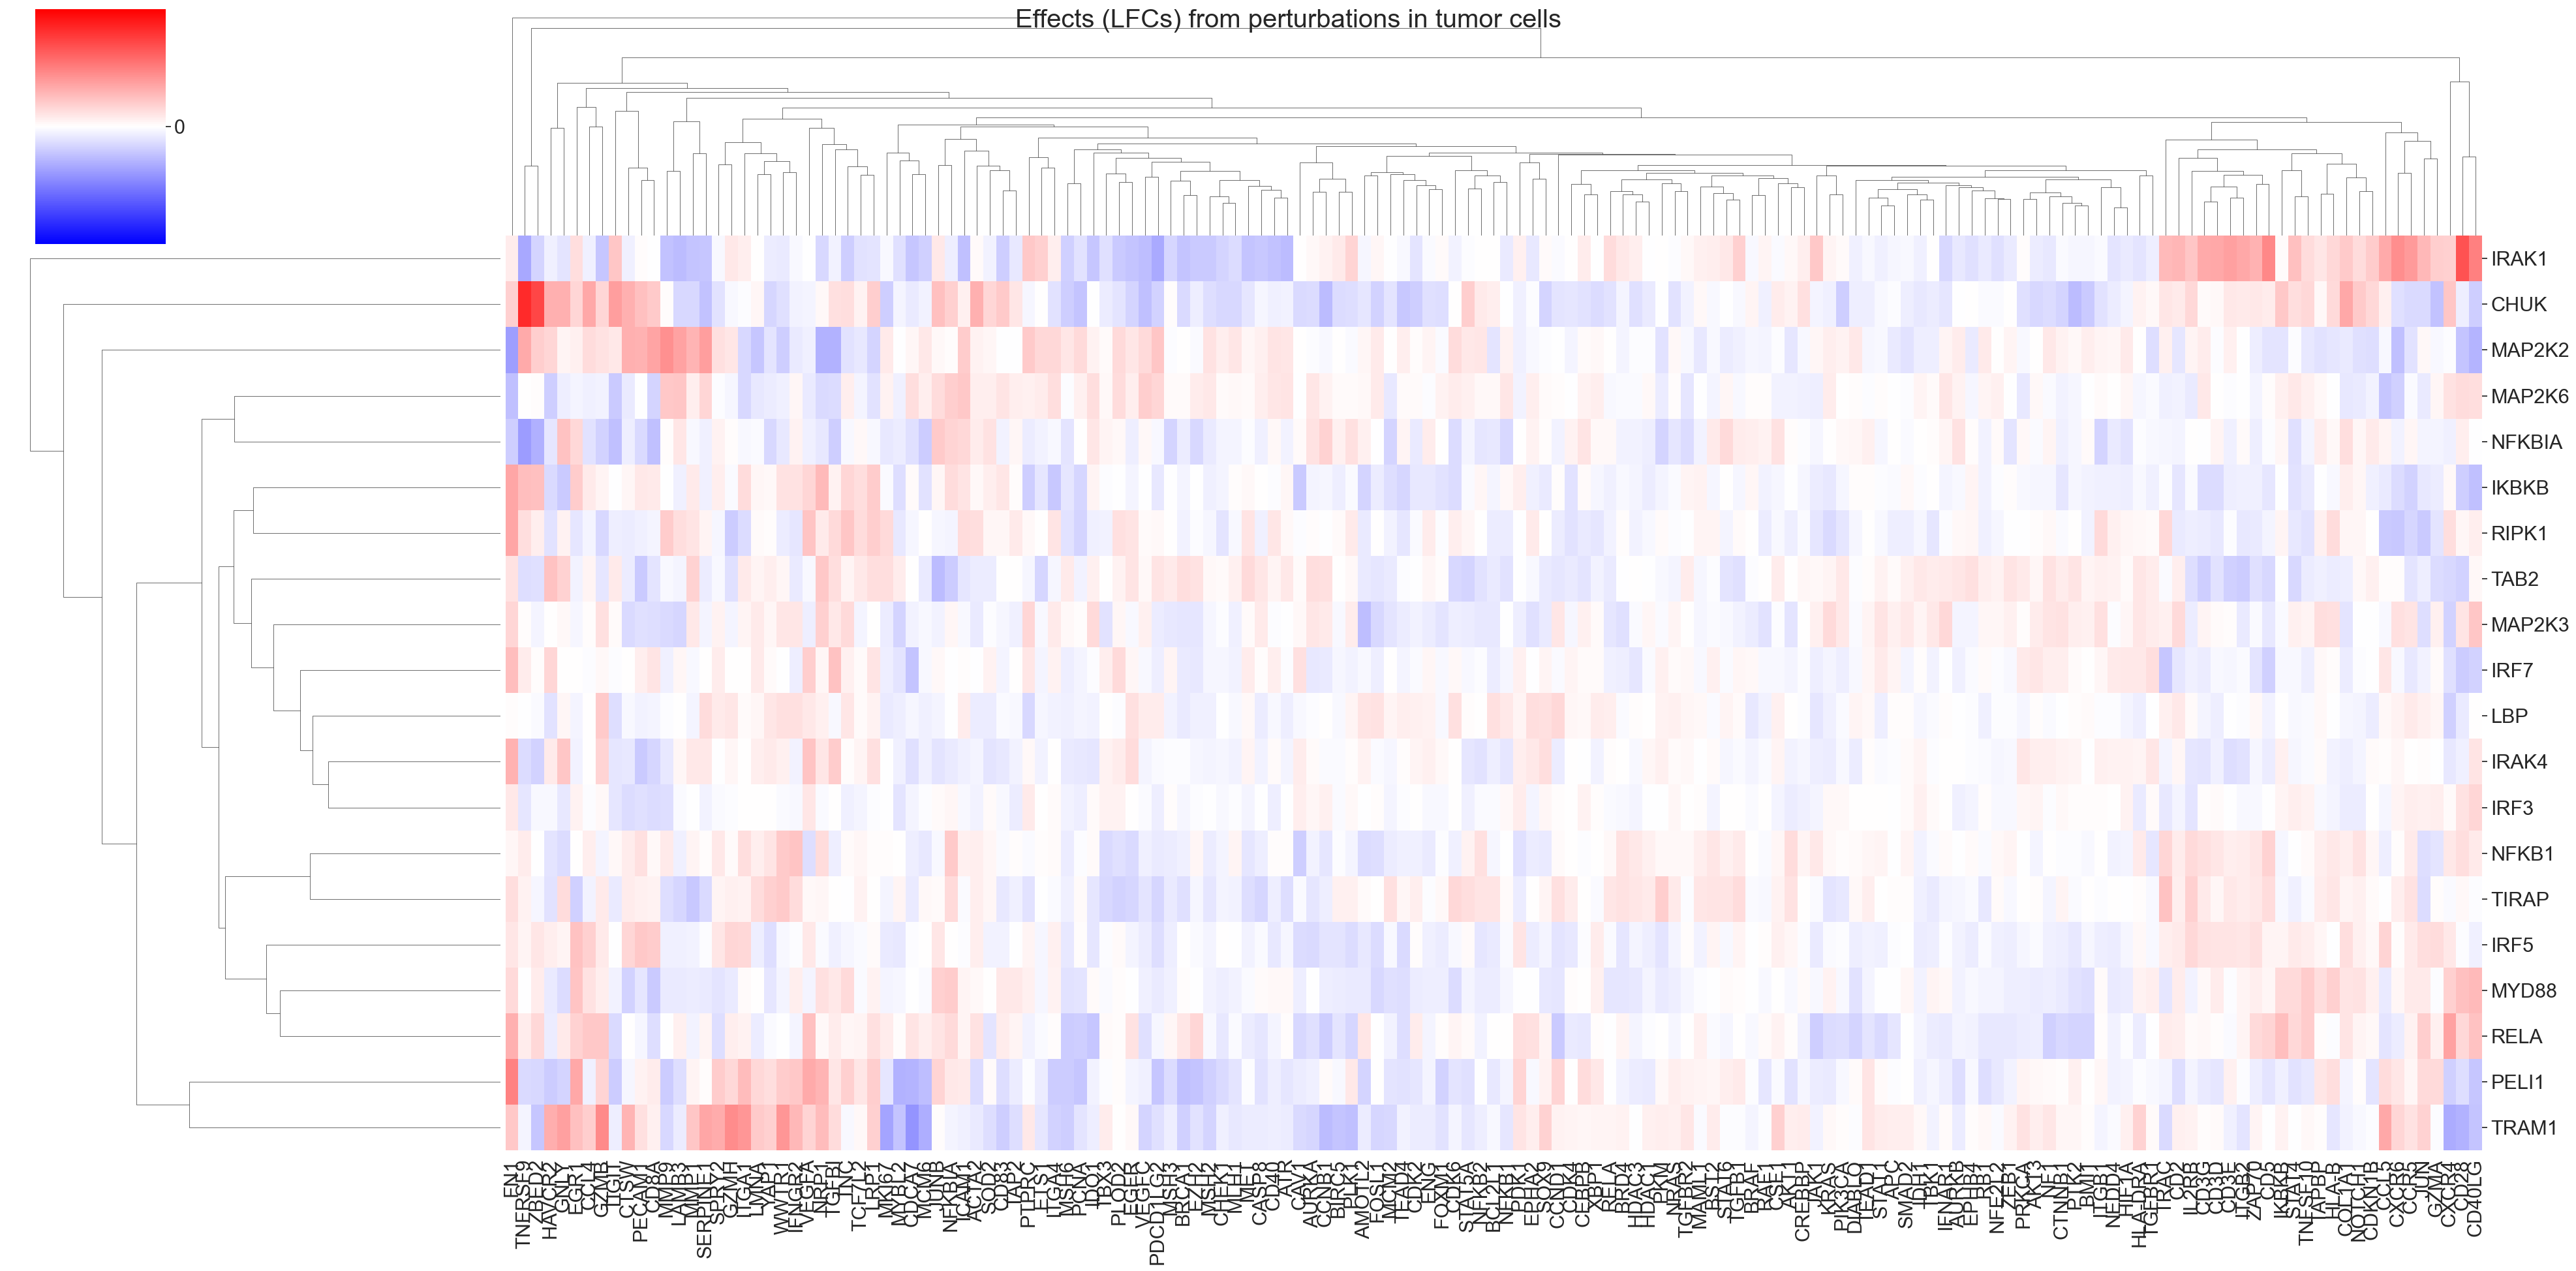

In [30]:
Tcells = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/tcellsperturbed_LFCsoriginal.csv")
Tcells = Tcells.set_index('Unnamed: 0', drop=True).rename_axis(None)
Tcells = Tcells.loc[::-1]
Tcells=Tcells.T
sns.set(font_scale=2)
g=sns.clustermap(Tcells,cmap='bwr',vmin=-0.6,vmax=0.6, cbar_kws={"ticks":[-1,0,1]},center=0,xticklabels=True,yticklabels=True,figsize=(40,20))
g.fig.suptitle('Effects (LFCs) from perturbations in tumor cells')

In [28]:
Tcells = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/tcellsperturbed_LFCsoriginal.csv")
Tcells = Tcells.set_index('Unnamed: 0', drop=True).rename_axis(None)
Tcells = Tcells.loc[::-1]
Tcells=Tcells.T
Tcells

,NOTCH1,VEGFC,EPHB4,TNFRSF9,CCL4,TRAC,CCL5,STAT5A,SMAD2,AURKB,...,COL1A1,ACTA2,SERPINE1,TGFB1,NFKBIA,GZMB,GZMH,IL2RB,XBP1,NFKB2
CHUK,0.12300,-0.14600,0.000341,0.49800,0.20600,0.05950,0.03600,0.11300,-0.039000,-0.002560,...,0.2040,0.18700,-0.142000,-0.01650,0.10800,0.0965,-0.015500,0.09290,-0.084300,0.048000
IKBKB,0.02340,-0.00371,0.024900,0.15400,0.05130,-0.00678,-0.05040,-0.01030,0.017800,-0.016600,...,0.0383,0.01440,-0.035900,-0.01930,0.08030,0.0252,-0.009460,-0.01280,-0.020100,0.022200
IRAK1,0.08380,-0.15400,-0.074100,-0.20200,-0.03410,0.16300,0.20100,-0.00498,-0.014900,-0.052000,...,0.1230,0.01350,-0.132000,0.10800,-0.04090,-0.1340,0.056200,0.13400,-0.000627,0.001060
IRAK4,-0.02520,-0.02720,-0.007360,-0.08430,0.00313,-0.02630,0.00516,-0.05640,0.010000,0.004220,...,-0.0383,-0.02440,0.055300,-0.01200,-0.04760,0.1010,0.023000,-0.06090,-0.031100,-0.066500
IRF3,-0.04320,-0.00942,-0.025600,-0.05800,-0.00580,-0.05170,-0.02160,-0.03330,0.010500,-0.035200,...,-0.0456,-0.02990,-0.028400,0.00293,0.02160,0.0142,-0.009310,-0.06450,0.005250,-0.013100
IRF5,0.03290,-0.04670,-0.042500,0.02500,0.11200,0.03920,0.10300,0.01370,-0.000507,-0.032800,...,0.0775,0.03940,-0.006310,0.02400,0.00363,0.0486,0.096800,0.09370,0.046500,-0.057600
IRF7,-0.00785,-0.01430,-0.010300,0.04410,-0.00535,-0.13200,0.05820,-0.01490,-0.027000,-0.034300,...,-0.0443,-0.00386,0.000197,0.02260,-0.00453,0.0161,0.000036,-0.03470,0.011100,-0.008120
LBP,-0.02350,0.04440,-0.004970,-0.00279,0.00244,0.03450,0.01540,0.00906,0.008410,-0.000941,...,-0.0206,-0.04290,0.082900,0.00961,-0.00335,0.1260,0.059800,0.01180,0.046700,0.001520
MAP2K2,-0.07180,0.08620,-0.047300,0.19900,0.07980,0.03680,-0.01510,0.05410,-0.066100,0.044200,...,-0.0511,0.03110,0.229000,-0.03480,0.00592,0.0697,0.060800,0.02540,0.016500,0.059300
MAP2K3,-0.00168,0.03470,-0.024000,0.00694,0.00793,0.03630,-0.01780,-0.04340,0.054900,-0.025800,...,-0.0636,-0.04880,-0.023800,-0.02890,0.02260,0.0719,-0.024500,-0.04350,0.013000,-0.052200


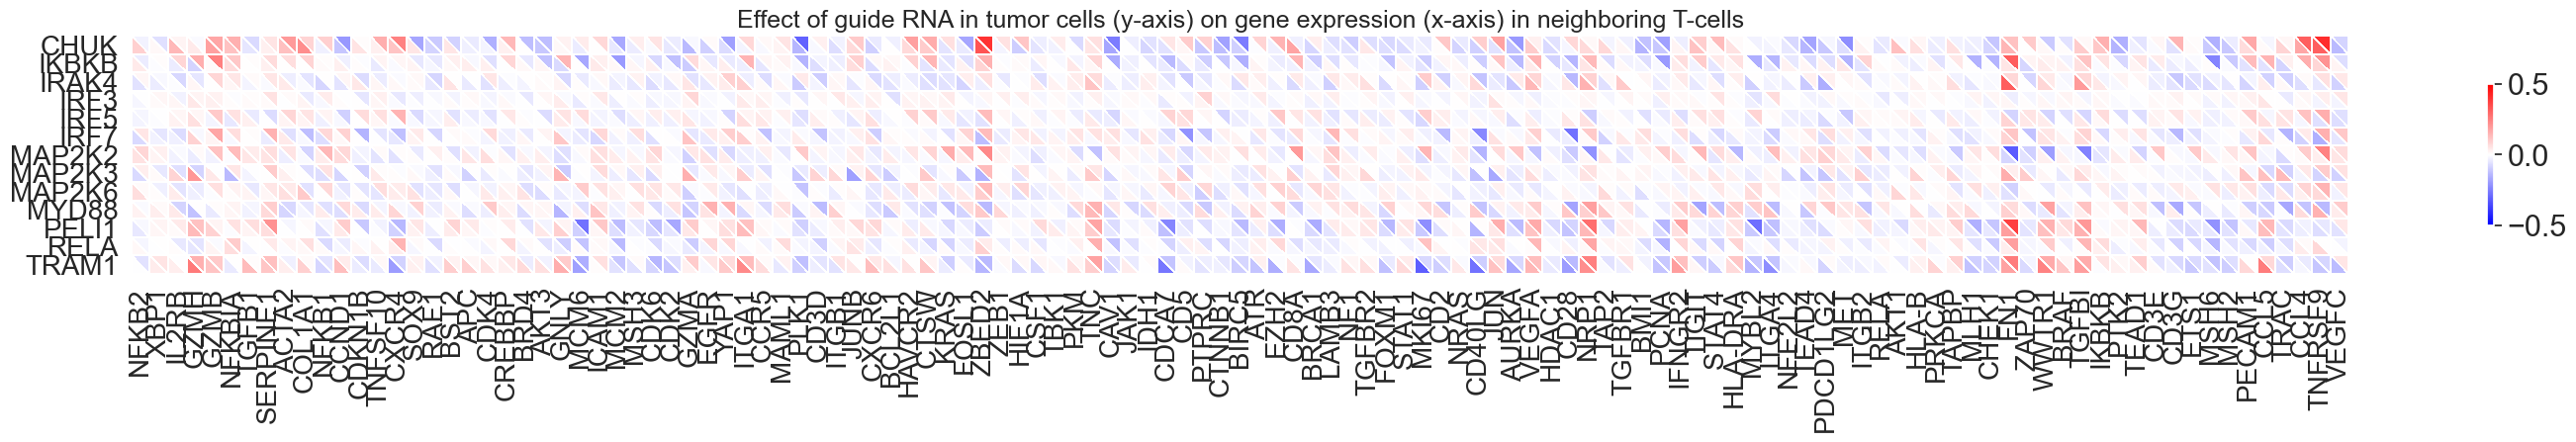

In [23]:
split1 = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/split1tcells_LFCs.csv")
split1 = split1.set_index('Unnamed: 0', drop=True).rename_axis(None)
split2 = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/split2tcells_LFCs.csv")
split2 = split2.set_index('Unnamed: 0', drop=True).rename_axis(None)
cmap = 'coolwarm' # 'RdBu_r'
split1=split1.T
split1 = split1.loc[::-1]
split2=split2.T
split2 = split2.loc[::-1]

save_split_heatmap_agbt(split1, split2,  "C:/Users/lbinan/Desktop/tumor/morecells/heatmapsplitsTcells.eps", vmax=5, 
                   tt=f'Effect of guide RNA in tumor cells (y-axis) on gene expression (x-axis) in neighboring T-cells', 
                   anno=False, cmap='bwr', figsize=(30,15), 
                   label_fontsize=20, value_fontsize=20, shrink_factor=0.1)

Text(0.5, 0.98, 'Effects (LFCs) from perturbations in tumor cells')

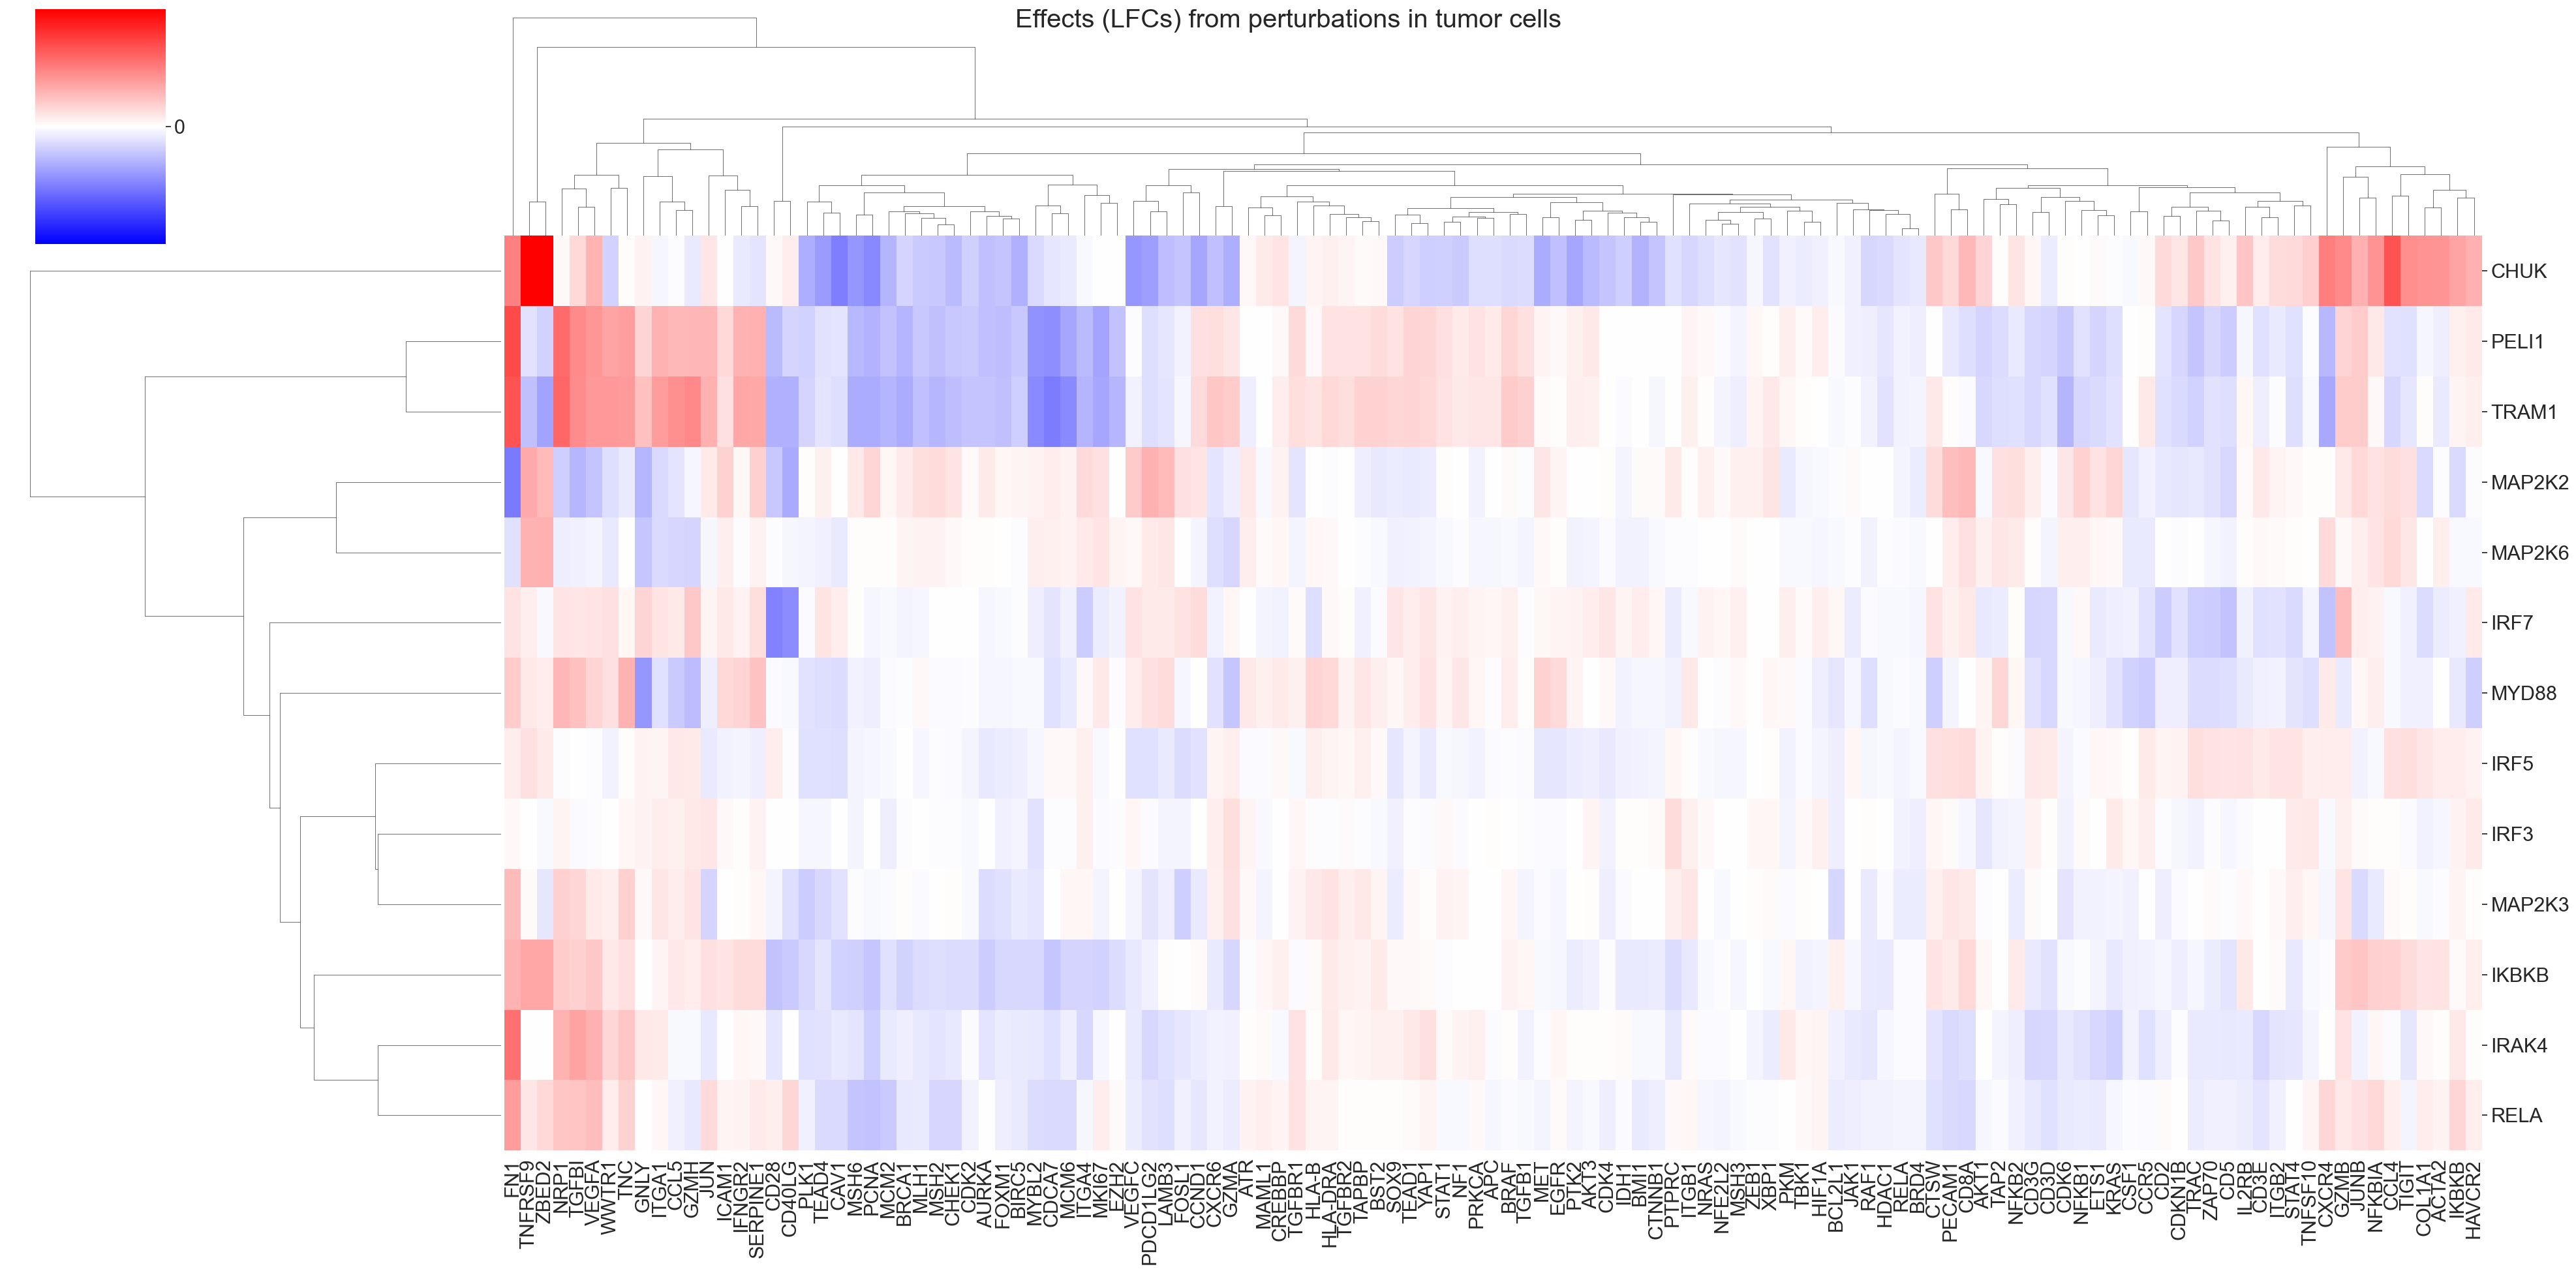

In [25]:
allcancercells = pd.read_csv("C:/Users/lbinan/Desktop/tumor/morecells/allTcellsevenstricter2_LFCs.csv")
allcancercells = allcancercells.set_index('Unnamed: 0', drop=True).rename_axis(None)
allcancercells = allcancercells.loc[::-1]
allcancercells=allcancercells.T
sns.set(font_scale=2)
g=sns.clustermap(allcancercells,cmap='bwr',vmin=-0.5,vmax=0.5, cbar_kws={"ticks":[-1,0,1]},center=0,xticklabels=True,yticklabels=True,figsize=(40,20))
g.fig.suptitle('Effects (LFCs) from perturbations in tumor cells')

In [ ]:
rows=g.dendrogram_row.reordered_ind
rows
rows = pd.DataFrame(rows)
rows.to_csv("C:/Users/lbinan/Desktop/tumor/morecells/pythonguideorder.csv",sep=',')
column=g.dendrogram_col.reordered_ind
column
column = pd.DataFrame(column)
column.to_csv("C:/Users/lbinan/Desktop/tumor/morecells/pythongeneorder.csv",sep=',')